In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
def coth(a):
    if a>0: return (1+tf.math.exp(-2*a))/(1-tf.math.exp(-2*a))
    if a<0: return (tf.math.exp(2*a)+1)/(tf.math.exp(2*a)-1)
    if a==0: return 0

def tanh(a):
    if a>0: return (1-tf.math.exp(-2*a))/(1+tf.math.exp(-2*a))
    if a<0: return (tf.math.exp(2*a)-1)/(tf.math.exp(2*a)+1)
    if a==0: return 0

In [3]:
data=10000
batch=100
set=100
layer=10
n_ini=1.0
n_fin=0.1
dn=-0.1
c_reg1=0.003
c_reg2=0.0001
d=2

m^2= <tf.Variable 'Variable:0' shape=() dtype=float64, numpy=2.031448440050258>
lam= <tf.Variable 'Variable:0' shape=() dtype=float64, numpy=0.2238225038676317>
alpha= <tf.Variable 'Variable:0' shape=() dtype=float64, numpy=0.3560147027876668>
beta= <tf.Variable 'Variable:0' shape=() dtype=float64, numpy=0.43708711038175396>
<tf.Variable 'Variable:0' shape=(10,) dtype=float64, numpy=
array([1.08489057, 1.13867393, 1.88704147, 2.41768827, 2.64702412,
       2.88530265, 2.02830604, 0.99047494, 1.69796261, 0.81147135])>


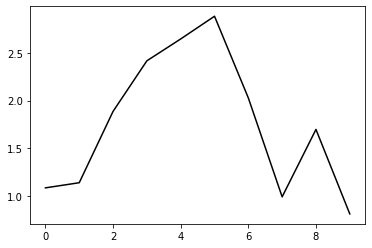

In [4]:
h=tf.zeros(layer)
h_in=[]
for i in range (layer):
    h_inn=np.float64(np.random.normal(2, 1))
    h_in.append(h_inn)
h=tf.Variable(h_in)
m2=tf.Variable(np.float64(np.random.normal(2, 1)))
lam=tf.Variable(np.float64(np.random.normal(1, 1)))
alpha=tf.Variable(np.float64(np.random.uniform(-0.5, 0.5)))
beta=tf.Variable(np.float64(np.random.uniform(-0.5, 0.5)))
#m2=tf.constant(np.float64(5.6))
#lam=tf.constant(np.float64(0.61))
#alpha=tf.constant(np.float64(1.444635))
#beta=tf.constant(np.float64(0.00615))
print("m^2=", m2)
print("lam=", lam)
print("alpha=", alpha)
print("beta=", beta)
print(h)
plt.plot(h.numpy(), 'k-')
plt.show()

In [5]:
def F_func(m, la, a,b):
    return 2*b/n_fin-m*a-la*(a**3)

def t_func(a):
    return 0.5*(tf.math.tanh(100*(a-0.1))-tf.math.tanh(100*(a+0.1))+2)

In [6]:
x=[i*0.2 for i in range (30)]
y=[0.0, 0.018, 0.035, 0.053, 0.0715, 0.0895, 0.107, 0.125, 0.146, 0.1665, 0.1875, 0.2085, 0.229, 0.25, 0.265, 0.281, 0.296, 0.3115, 0.3275, 0.343, 0.3565, 0.385, 0.4375, 0.5, 0.6, 0.675, 0.735, 0.815, 0.865, 0.885]
y[:]=[2*v for v in y]
fp1 = np.polyfit(x, y, 15)
print(fp1)

[ 1.59046394e-05 -6.81729682e-04  1.31412795e-02 -1.50525136e-01
  1.14052774e+00 -6.02241647e+00  2.27455168e+01 -6.20704699e+01
  1.22166922e+02 -1.71187074e+02  1.66428955e+02 -1.07461552e+02
  4.28229887e+01 -9.20544914e+00  9.55260239e-01 -1.30911492e-04]


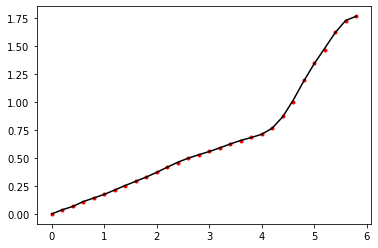

In [7]:
def f(x):
    y=0
    for i in range (16):
        y=y+fp1[i]*x**(15-i)
    return y
yy=[f(i*0.2) for i in range (30)]
plt.plot(x, y, 'r.')
plt.plot(x, yy, 'k-')
plt.show()

In [8]:
def NN_func_p(f):
    Positive=[]
    append=Positive.append
    while len(Positive)<batch:
        H=np.random.uniform(0.0, 6.0)
        M=np.random.uniform(0.0, 2.0)
        noise=np.abs(np.random.normal(0, 0.1))
        if np.abs(M-f(H))<=noise: append([H, M])
        else: continue
    return Positive
def NN_func_n(f):
    Negative=[]
    append=Negative.append
    while len(Negative)<batch:
        H=np.random.uniform(0.0, 6.0)
        M=np.random.uniform(0.0, 2.0)
        noise=np.abs(np.random.normal(0, 0.1))
        if np.abs(M-f(H))>noise: append([H, M])
        else: continue
    return Negative

In [9]:
Positive=[]
Negative=[]
for i in range (set):
    Positive.insert(i, NN_func_p(f))
    Negative.insert(i, NN_func_n(f))

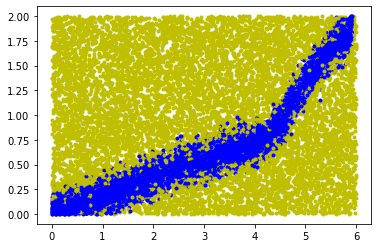

In [10]:
x_data1=[]
y_data1=[]
x_data2=[]
y_data2=[]
for i in range (set):
    x_data1.insert(i, [v[0] for v in Positive[i]])
    y_data1.insert(i, [v[1] for v in Positive[i]])
    x_data2.insert(i, [v[0] for v in Negative[i]])
    y_data2.insert(i, [v[1] for v in Negative[i]])
    plt.plot(x_data2[i], y_data2[i], 'y.')
    plt.plot(x_data1[i], y_data1[i], 'b.')
plt.show()

In [11]:
def Dfunc(hh, m):
    D=tf.math.sqrt(tf.math.abs(1+4*m/(hh[0]**2)))
    return D

In [12]:
def LP2(hh, m, la, alpha, beta, HH, MM):
    D=Dfunc(hh, m)
    phi=alpha*HH+beta*MM
    pi=(d/2)*(D-1)*alpha*HH+(d/2)*(-D-1)*beta*MM
    for j in range (layer-1):
        phi1=phi+dn*pi
        pi1 =phi*m*dn+(1-dn*hh[j])*pi+dn*la*(phi1**3)
        phi=phi1
        pi=pi1
    return phi, pi
def NN_func_01(hh, m, la, alpha, beta, list_hr):
    PP=[]
    NN=[]
    H=np.array(list_hr)[:, 0]
    M=np.array(list_hr)[:, 1]
    F=np.array(tf.math.abs(LP2(hh, m, la, alpha, beta, H, M)[1]))
    for i in range (len(H[F<0.1])):
        PP.append([H[F<0.1][i], M[F<0.1][i]])
    for i in range (len(H[F>=0.1])):
        NN.append([H[F>=0.1][i], M[F>=0.1][i]])
    return PP, NN

In [13]:
Positive0=[]
Positive1=[]
Negative0=[]
Negative1=[]
for i in range (set):
    Positive0.insert(i, NN_func_01(h, m2, lam, alpha, beta, Positive[i])[0])
    Positive1.insert(i, NN_func_01(h, m2, lam, alpha, beta, Positive[i])[1])
    Negative0.insert(i, NN_func_01(h, m2, lam, alpha, beta, Negative[i])[0])
    Negative1.insert(i, NN_func_01(h, m2, lam, alpha, beta, Negative[i])[1])

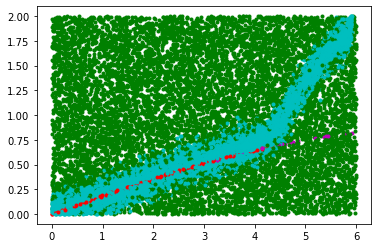

In [14]:
x_data1=[]
y_data1=[]
x_data2=[]
y_data2=[]
x_data3=[]
y_data3=[]
x_data4=[]
y_data4=[]
for i in range (set):
    x_data1.insert(i, [v[0] for v in Positive0[i]])
    y_data1.insert(i, [v[1] for v in Positive0[i]])
    x_data2.insert(i, [v[0] for v in Positive1[i]])
    y_data2.insert(i, [v[1] for v in Positive1[i]])
    x_data3.insert(i, [v[0] for v in Negative0[i]])
    y_data3.insert(i, [v[1] for v in Negative0[i]])
    x_data4.insert(i, [v[0] for v in Negative1[i]])
    y_data4.insert(i, [v[1] for v in Negative1[i]])
    plt.plot(x_data4[i], y_data4[i], 'g.')
    plt.plot(x_data2[i], y_data2[i], 'c.')
    plt.plot(x_data1[i], y_data1[i], 'r.')
    plt.plot(x_data3[i], y_data3[i], 'm.')
plt.show()

# Error function

$E=\sum_{data} \left\vert y(\bar{x}^{(1)}) - \bar{y} \right\vert+E_{reg}(W)$
, $E_{reg}=c_{reg}^{(1)}\sum_{n=1}^{N-1}(\eta^{(n)})^{4}(h(\eta^{(n+1)})-h(\eta^{(n)}))^{2}+c_{reg}^{(2)}(h(\eta^{(N)})-1/\eta^{(N)})^{2}$

In [15]:
def Error_func(hh, m, la, alpha, beta, list1, list2):
    H0=np.array([v[0] for v in list1])
    M0=np.array([v[1] for v in list1])
    H1=np.array([v[0] for v in list2])
    M1=np.array([v[1] for v in list2])
    H_0, M_0=LP2(hh, m, la, alpha, beta, H0, M0)
    H_1, M_1=LP2(hh, m, la, alpha, beta, H1, M1)
    PPlist=t_func(M_0)
    NNlist=t_func(M_1)
    sum_p=sum(PPlist)/batch
    sum_n=(batch-sum(NNlist))/batch

    inside=0
    for k in range (layer-1):
        second=((n_ini+k*dn)**4)*((hh[k+1]-hh[k])**2)
        inside=inside+second
    E_reg1=c_reg1*inside
    E_reg2=c_reg2*((hh[layer-1]-1/n_fin)**2)
    return sum_n+sum_p+E_reg1+E_reg2

In [16]:
for i in range (set):
    print(Error_func(h, m2, lam, alpha, beta, Positive[i], Negative[i]))

tf.Tensor(1.0001623022070127, shape=(), dtype=float64)
tf.Tensor(0.977963743886009, shape=(), dtype=float64)
tf.Tensor(0.9774345825077636, shape=(), dtype=float64)
tf.Tensor(0.9805377275078193, shape=(), dtype=float64)
tf.Tensor(0.9533859535255473, shape=(), dtype=float64)
tf.Tensor(0.9459619214980115, shape=(), dtype=float64)
tf.Tensor(0.9421693473802686, shape=(), dtype=float64)
tf.Tensor(0.9641693022556226, shape=(), dtype=float64)
tf.Tensor(0.9890259012456547, shape=(), dtype=float64)
tf.Tensor(0.9402768416248565, shape=(), dtype=float64)
tf.Tensor(0.929146713261988, shape=(), dtype=float64)
tf.Tensor(1.0009328859044613, shape=(), dtype=float64)
tf.Tensor(0.9901685498631411, shape=(), dtype=float64)
tf.Tensor(0.9901378318822913, shape=(), dtype=float64)
tf.Tensor(1.0095090610450117, shape=(), dtype=float64)
tf.Tensor(0.9264479041398277, shape=(), dtype=float64)
tf.Tensor(0.9202719000249886, shape=(), dtype=float64)
tf.Tensor(0.9335096417440696, shape=(), dtype=float64)
tf.Tensor(0.

# Optimize

0 0.9678885881384393
2.039803791418641 0.21546174986746439 0.3643783118095547 0.4287235163637639
[1.0348916  1.18866563 1.83706978 2.36773736 2.69666099 2.83538051
 2.07817592 1.04033197 1.64833613 0.8614553 ]


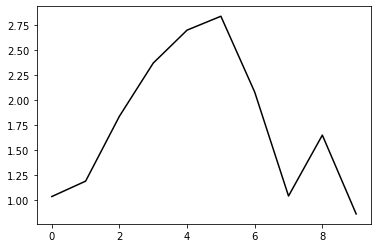

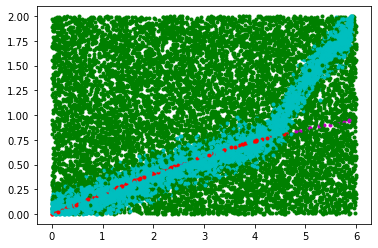

1000 1.0038911096214407
1.901447053753757 0.3461517320661889 0.28321204122766225 0.5277493287943477
[ 1.80413026  1.01886547  0.93910261  1.24203043  1.53019044  1.57007329
  0.98956635 -0.04819536  0.18554194  5.53650759]


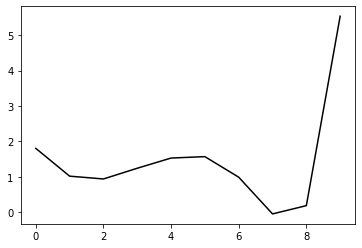

2000 0.9851339954946565
1.8563212303497434 0.36642327330398977 0.2882068200200057 0.5262441441855134
[ 1.84138224  1.4162212   1.08804219  0.84615968  0.68439319  0.44815455
 -0.14939788 -1.23745335 -1.31678489  9.29531324]


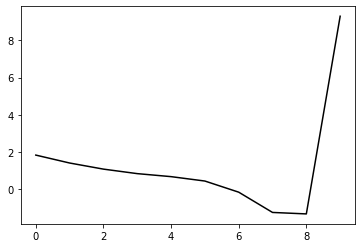

3000 0.9208198382092317
1.663065235537381 0.37137613512793444 0.2820958937521672 0.4474799620163183
[ 1.60708326  0.85836408  0.11497919 -0.73649137 -1.72941921 -2.80665663
 -3.8968508  -5.09954649 -5.10453883  9.30907016]


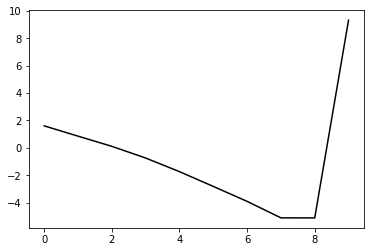

4000 0.3118540850175723
1.405880137704343 0.3165835739131126 0.20357009607217882 0.27830088738217473
[ 0.49825039  0.70203913  0.08718724 -0.98087158 -2.27755978 -3.74396593
 -5.29516684 -6.86920473 -7.10093194  9.22025466]


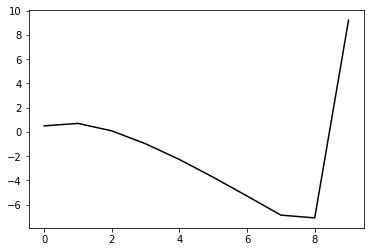

5000 0.3762400093226833
1.437320232194691 0.2692755696588818 0.17815991161116781 0.3178747329571226
[ 0.47086241  0.61495741  0.28059614 -0.5710245  -1.80461922 -3.28422761
 -4.8941606  -6.49394654 -6.70063177  9.26879385]


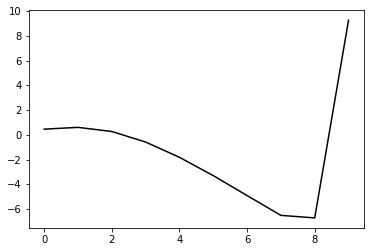

6000 0.3881957097463868
1.433552895852365 0.13922855197785736 0.17062854646349776 0.31170838271129436
[ 0.44709485  0.54170141  0.27140928 -0.4319648  -1.58403108 -3.09506924
 -4.82572477 -6.56904806 -6.9565907   9.20712332]


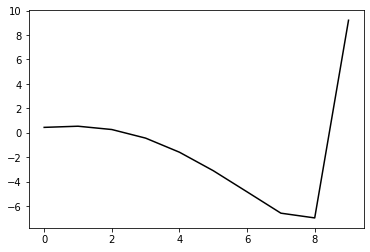

7000 0.3702316110531935
1.4363528497190583 0.045768580291718784 0.164611439134929 0.3179892889192112
[ 0.4686943   0.54312104  0.34078956 -0.2412984  -1.27833233 -2.75567554
 -4.54680108 -6.3792578  -6.87237488  9.19270223]


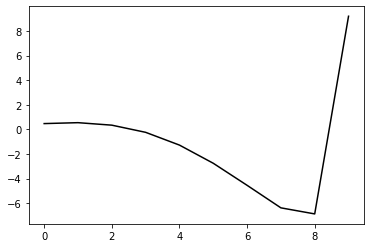

8000 0.33993224011138623
1.418435016818478 -0.08745073003140544 0.1663226714925422 0.3037675164335339
[ 0.48693059  0.47312992  0.29479147 -0.21440634 -1.1640732  -2.61260057
 -4.48856127 -6.48324048 -7.2072679   9.19020377]


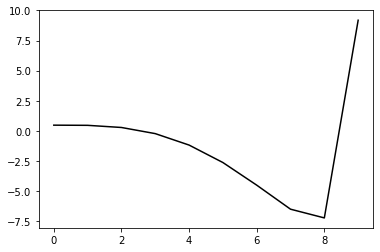

9000 0.3126378455859409
1.4181003241394925 -0.09025192203347096 0.16137120055071316 0.30922523417413217
[ 0.46935436  0.52999399  0.39086183 -0.05283307 -0.91695504 -2.30264892
 -4.19990874 -6.29901213 -7.18918375  9.26636531]


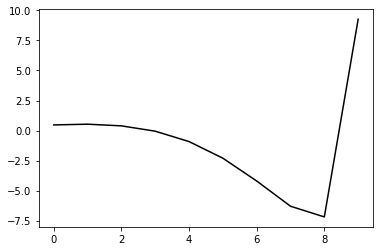

10000 0.3249665298653708
1.4192601429917242 -0.08330967248480074 0.16324291959110881 0.30366061141296935
[ 0.45879156  0.60134223  0.47413272  0.0793751  -0.71250246 -2.03133017
 -3.92278874 -6.09929625 -7.12779924  9.17803729]


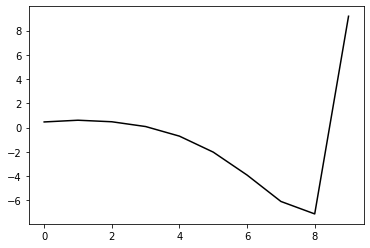

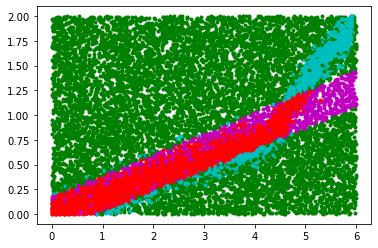

11000 0.3077874320939471
1.4168998818114489 -0.11477149075242818 0.161675884545266 0.3053738445809121
[ 0.51144091  0.59075441  0.49613835  0.14597737 -0.58395617 -1.84536503
 -3.73722733 -6.00159657 -7.14998362  9.23955508]


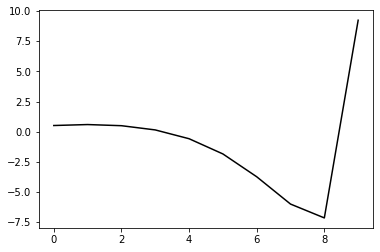

12000 0.4568053966409009
1.4108980389857197 -0.10197684817323317 0.16237770674454405 0.2977730518133814
[ 0.56096497  0.57658253  0.49136833  0.17591923 -0.4968171  -1.69137499
 -3.54970255 -5.87540188 -7.17209071  9.21763682]


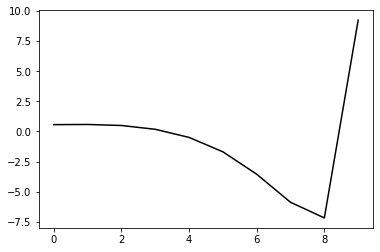

13000 0.45669647287523946
1.3931142381252755 -0.11601228610192375 0.17073087258137204 0.2790354471881386
[ 0.53101718  0.62545317  0.54015775  0.24559052 -0.38673471 -1.52800523
 -3.35670109 -5.7502432  -7.23866122  9.2034676 ]


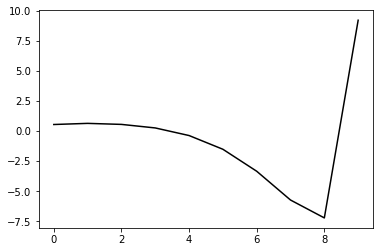

14000 0.35491043198823935
1.3957002474003541 -0.11399680194015396 0.16809773990342347 0.2837504677093739
[ 0.57450904  0.67274984  0.61220587  0.34973298 -0.23458497 -1.31419489
 -3.09228503 -5.50376686 -7.07861661  9.24319637]


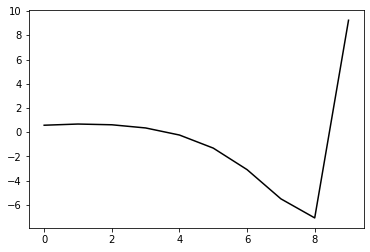

15000 0.2970419835763686
1.3672601810851368 -0.140523556064795 0.1712708892546252 0.2700286857854882
[ 0.62276666  0.56755061  0.52656735  0.28466651 -0.27216122 -1.3174645
 -3.08124688 -5.56843921 -7.34506643  9.20898262]


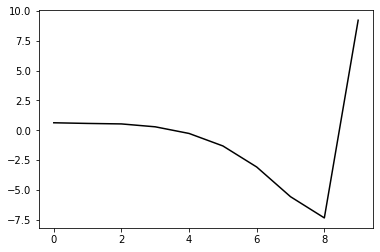

16000 0.3984351920752343
1.3229847714732115 -0.23412605767492914 0.19372121295147213 0.2435976298765831
[ 0.59490184  0.61214305  0.5543196   0.34931759 -0.14561493 -1.11250561
 -2.8057176  -5.31659693 -7.27173719  9.21058817]


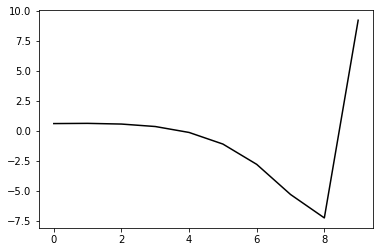

17000 0.25890560065527896
1.2596002973193137 -0.34393456485546664 0.23274065265790747 0.2468782361876164
[ 0.87298566  0.65539379  0.62877064  0.5774426   0.30364794 -0.38955656
 -1.78102518 -4.04904598 -5.91097703  9.26690233]


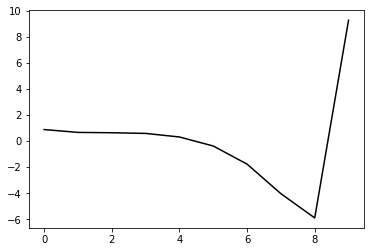

18000 0.18016180771689272
1.2472684484523964 -0.3399559408737368 0.24174442246068129 0.22792146619835932
[ 1.01286838  0.75356409  0.69632599  0.66418043  0.45590954 -0.15627353
 -1.46456558 -3.67736347 -5.5885109   9.22897715]


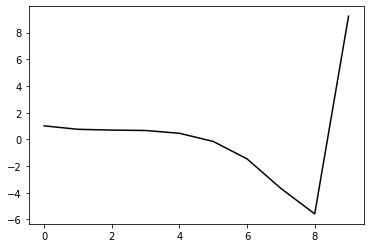

19000 0.15260581741028473
1.239611872140593 -0.3322281550003616 0.24563035139089304 0.21117182288926217
[ 1.03770144  0.90391059  0.8315281   0.78826211  0.6055112   0.04308652
 -1.20726021 -3.38108087 -5.33724262  9.28406951]


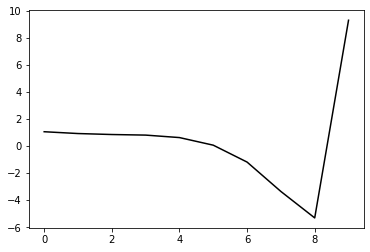

20000 0.14099183202437862
1.2312091709306514 -0.3270572899156946 0.2466656449087163 0.20102724698655117
[ 1.06044579  1.02311146  0.9529848   0.89546988  0.72296669  0.19808544
 -1.00569216 -3.15922165 -5.19727648  9.30215254]


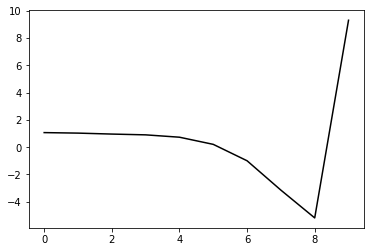

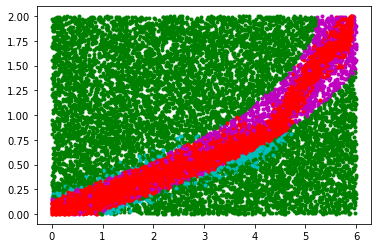

21000 0.2550042386967445
1.2166030663197664 -0.3212461642765689 0.24567040202077667 0.1929543537406641
[ 1.17165323  1.05345346  1.00390627  0.94290332  0.77529197  0.2786163
 -0.8852614  -3.02344707 -5.15608192  9.30672768]


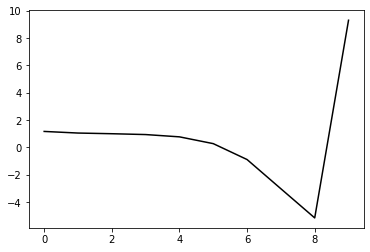

22000 0.2633081088813484
1.1911034040014792 -0.3195911811256618 0.2444215224654132 0.18463771401237486
[ 1.13709055  1.1787292   1.13930315  1.06978232  0.89489467  0.40962842
 -0.73076038 -2.87073113 -5.12146352  9.33104399]


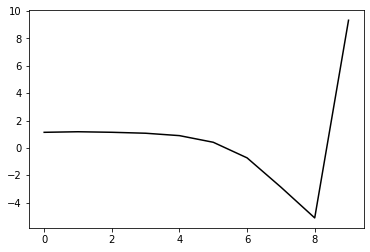

23000 0.17368231128435377
1.1579378901022743 -0.3238416836928489 0.24749223960432307 0.17577331695027715
[ 1.17860696  1.22951598  1.20929005  1.14488649  0.96975276  0.49733707
 -0.61819923 -2.75742765 -5.1318846   9.27042027]


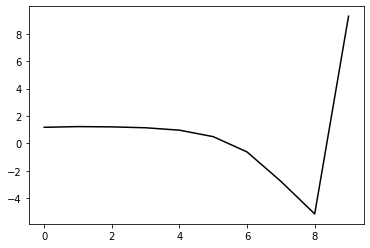

24000 0.25751987497174267
1.1404984824837057 -0.3159482555370736 0.24392544278441217 0.1698056424470869
[ 1.19858523  1.28322359  1.28696253  1.23345955  1.0651023   0.61087628
 -0.47121226 -2.58890574 -5.02287218  9.31181865]


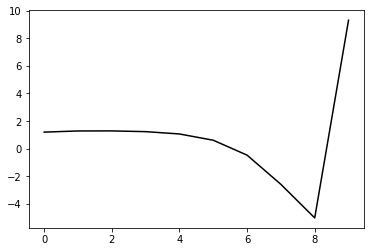

25000 0.24027393856466578
1.1227857958810115 -0.3057504307564141 0.24017855190363005 0.16265342240413194
[ 1.27176067  1.28553087  1.3039484   1.26458659  1.10664446  0.67162009
 -0.37617082 -2.47425568 -4.98479408  9.34664353]


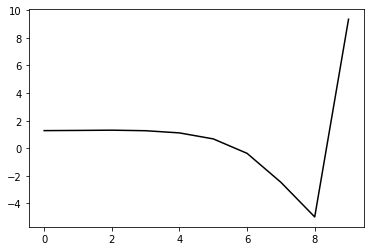

26000 0.2238241559526863
1.0951176061587606 -0.30075610816238274 0.2373149940850799 0.15867005023991013
[ 1.32443415  1.31947131  1.35188712  1.32699472  1.1823202   0.76568018
 -0.25233889 -2.33416114 -4.91432914  9.28935559]


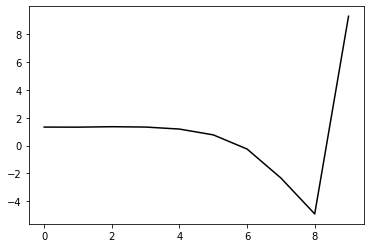

27000 0.17960028191366756
1.041339917461477 -0.30774158976688376 0.23772152543190558 0.15531574135864626
[ 1.30354667  1.38911638  1.44250392  1.42362044  1.28127449  0.87055062
 -0.13302758 -2.21647748 -4.8915843   9.30375094]


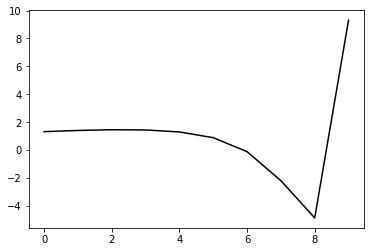

28000 0.184816305949148
1.0190844105862558 -0.2991604737987925 0.23241550876679493 0.15341824929992925
[ 1.29830398  1.42277466  1.49308017  1.47865905  1.3325855   0.91769136
 -0.08508187 -2.18367287 -4.95345234  9.29154497]


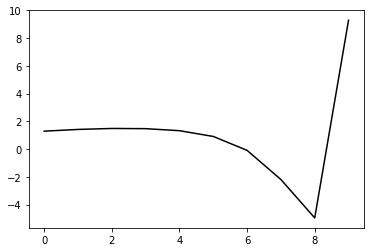

29000 0.1939033164154508
0.9868578286593768 -0.2976373398630591 0.23076188210318593 0.15110419856034313
[ 1.26444226  1.4933397   1.58617208  1.58829366  1.45138645  1.04514266
  0.0583842  -2.03531907 -4.88147326  9.27778879]


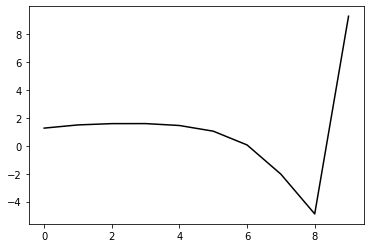

30000 0.18513050196865505
0.9497090960519778 -0.2908055182343788 0.22382318191619888 0.1511341233418559
[ 1.30984595  1.48087104  1.58630989  1.59450993  1.45826519  1.05178946
  0.07109306 -2.02478857 -4.95358644  9.28889956]


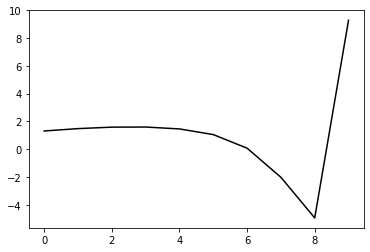

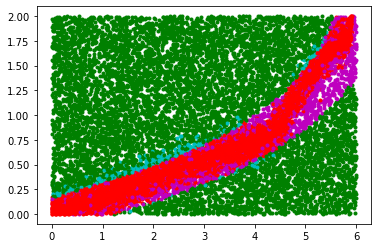

31000 0.27858995632838024
0.9159829235704845 -0.29082024350785457 0.22399267696780673 0.1511771177725443
[ 1.38918437  1.44931067  1.58519235  1.6256968   1.51756355  1.13714014
  0.18649272 -1.88741864 -4.85787182  9.31449214]


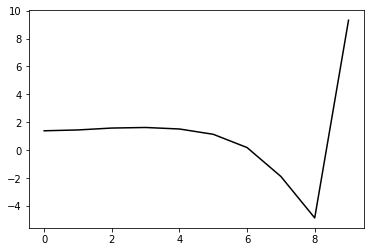

32000 0.2115535113242704
0.8767319569621423 -0.28533372020374126 0.22063200177995432 0.1452563402902137
[ 1.36537818  1.45519296  1.59286375  1.63036308  1.5144559   1.12130294
  0.15670841 -1.94608098 -5.03120374  9.30886974]


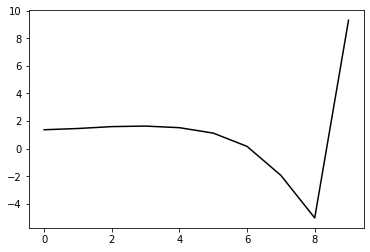

33000 0.17834461842123991
0.8464061814966232 -0.2849476471401879 0.22137009745438424 0.14564374190461016
[ 1.27295301  1.60637697  1.76091467  1.81994811  1.72312791  1.34493005
  0.39444534 -1.7034124  -4.84390386  9.31573895]


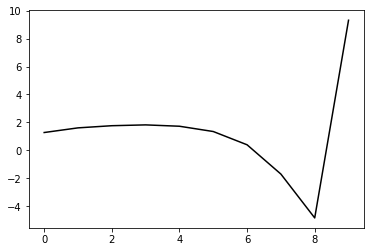

34000 0.1791620286134911
0.8092172621921367 -0.2823389369128483 0.21940109579231484 0.14501470240693856
[ 1.29475525  1.58050205  1.75269771  1.82528009  1.74073035  1.37139943
  0.42840265 -1.67155893 -4.88297206  9.33255418]


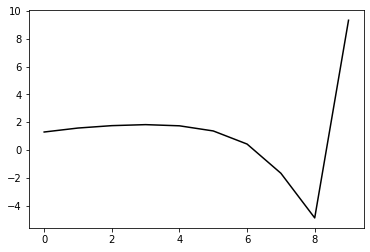

35000 0.21347552006953105
0.7858052670713795 -0.2768127349293496 0.21917571775257275 0.1417530645478231
[ 1.26425092  1.65386105  1.85065223  1.94281506  1.87551333  1.51969814
  0.58581682 -1.51749264 -4.79845778  9.31629581]


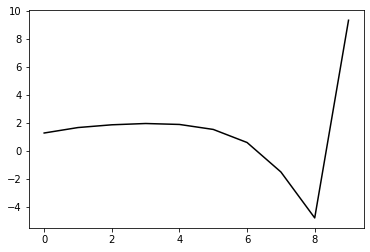

36000 0.23113931374666244
0.7472358561292044 -0.275473409446857 0.21778403445677105 0.14032331118759622
[ 1.25282822  1.63278323  1.83649866  1.93944157  1.88053967  1.53064102
  0.60082717 -1.50736737 -4.86214457  9.31639376]


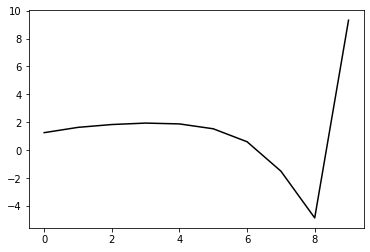

37000 0.18313586077834462
0.7273493105763655 -0.26612330595645817 0.21308618820806602 0.1401433770434816
[ 1.27522279  1.60946685  1.81362228  1.91677308  1.85593272  1.50082435
  0.56529142 -1.54945996 -4.949817    9.34688824]


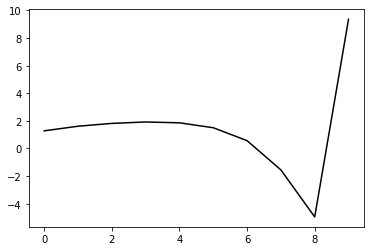

38000 0.2968117682836781
0.6866483368557919 -0.26717261317413193 0.21364908227113685 0.1408867414796053
[ 1.25849005  1.62645339  1.85400815  1.98427049  1.9499814   1.6180802
  0.69971971 -1.41167823 -4.88260388  9.28031865]


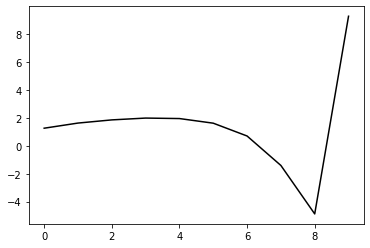

39000 0.21391789789192261
0.6557758431660787 -0.2652308435338142 0.21251849801838135 0.1416356726932355
[ 1.25793261  1.66786775  1.91730965  2.07025069  2.06130113  1.75302684
  0.85139101 -1.25924222 -4.80212401  9.33963511]


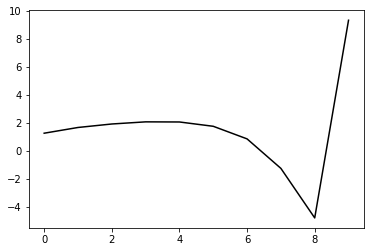

40000 0.2151267322465608
0.6175637123876973 -0.26110231559198266 0.20974633695040096 0.13665167796641764
[ 1.27614932  1.55917655  1.78010894  1.91909112  1.90117425  1.58440772
  0.67031039 -1.46627461 -5.10654087  9.30720695]


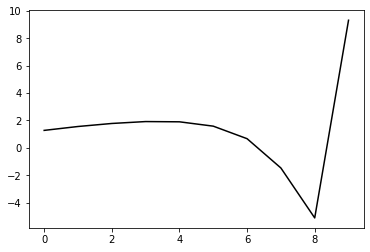

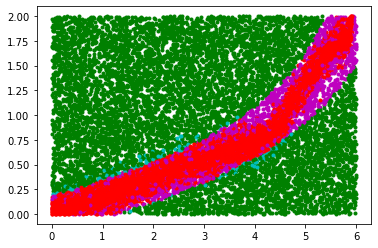

41000 0.17050237190258288
0.6017744395301954 -0.25622928414121016 0.2103508587927482 0.13504531648371618
[ 1.28107561  1.63973983  1.88117814  2.05219667  2.07615879  1.8008234
  0.91756594 -1.20868117 -4.90911676  9.3126673 ]


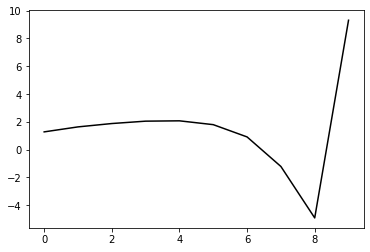

42000 0.221633721338162
0.568008354329518 -0.25709690802231666 0.2120019875477822 0.13813842696395034
[ 1.29238243  1.58325157  1.84010032  2.03206792  2.0840796   1.84946129
  1.0158129  -1.06378039 -4.76943866  9.31934191]


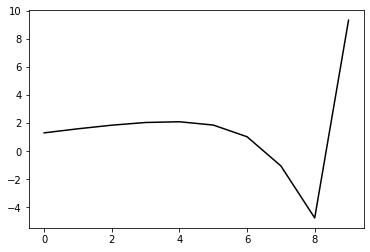

43000 0.19795249481479263
0.5504761007408592 -0.2514945885592548 0.21015369184371235 0.1381115091550319
[ 1.25564744  1.61577892  1.86830714  2.05045098  2.100943    1.87520401
  1.05959473 -1.00418561 -4.75054343  9.31361073]


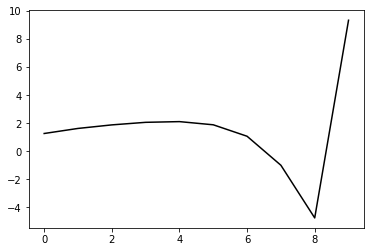

44000 0.29055074838251516
0.5226105513906941 -0.24361599347633825 0.20484534108598557 0.14033859883448546
[ 1.30532447  1.54082163  1.78009363  1.96057969  2.01452481  1.80129241
  1.00588923 -1.04272215 -4.83404377  9.3340389 ]


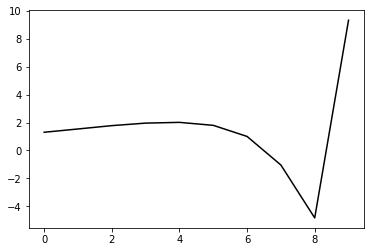

45000 0.24738087971553777
0.5163150863758681 -0.2439568675070887 0.21012108369375077 0.13150592704022093
[ 1.22216175  1.64193871  1.89304121  2.07382166  2.12837325  1.91953038
  1.13411179 -0.90681887 -4.74066913  9.30530728]


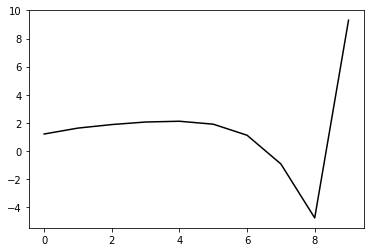

46000 0.1432153611628721
0.48517643950577527 -0.24334022277054074 0.20979717878757315 0.13500578669994576
[ 1.26188327  1.55785085  1.80047679  1.98049583  2.03813896  1.83954989
  1.07328353 -0.94764931 -4.80690315  9.31114517]


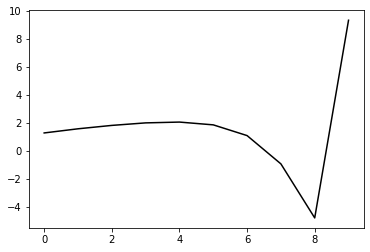

47000 0.14148505822027246
0.4742593001609127 -0.23699659085159544 0.20928653368123348 0.13292974095064192
[ 1.23566763  1.59708206  1.85592138  2.05269802  2.13199722  1.96306376
  1.23561185 -0.74648635 -4.61869273  9.3246435 ]


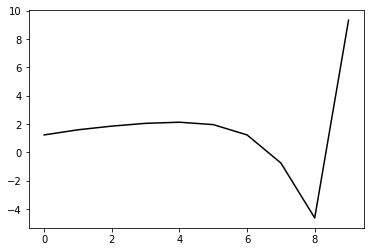

48000 0.218826344619601
0.457948238546808 -0.235780146667147 0.21016874054421825 0.13380695469859424
[ 1.23950779  1.56874903  1.82328918  2.01526873  2.09770018  1.94135328
  1.2351947  -0.72492697 -4.61869905  9.31599928]


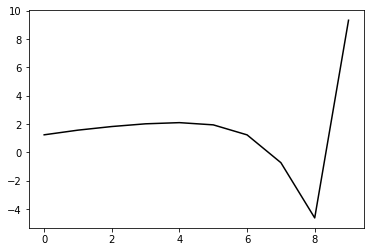

49000 0.15881441758571732
0.4447274283719287 -0.23236494946989295 0.21009738100279304 0.1318793681552962
[ 1.20881405  1.51424921  1.74146106  1.93050195  2.01593055  1.8689443
  1.18200289 -0.75486919 -4.67010623  9.37836324]


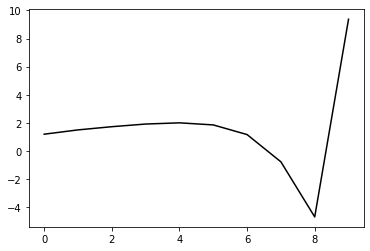

50000 0.14399577591484541
0.431540845020389 -0.23137526604742045 0.2106995879802208 0.13324841705265303
[ 1.20077288  1.45742693  1.68053593  1.87179162  1.9722449   1.85219217
  1.20217122 -0.69322272 -4.60144171  9.3274552 ]


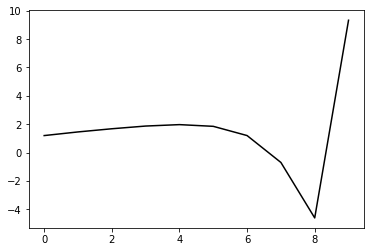

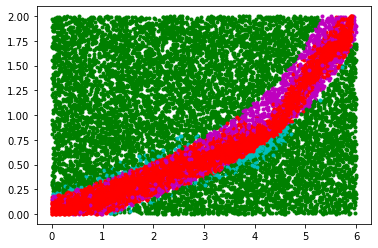

51000 0.27294708658461114
0.42255346407303906 -0.22754091081499297 0.2096072591809701 0.13377546208885469
[ 1.20908595  1.48867139  1.69087674  1.85941356  1.95106528  1.83524702
  1.20104708 -0.67298621 -4.59618686  9.33004572]


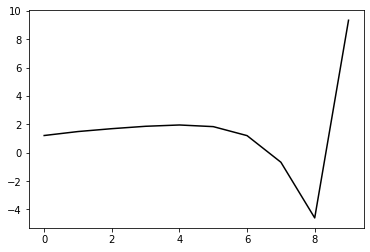

52000 0.22718272031327955
0.40743450705159817 -0.22380220051860986 0.2081793465265401 0.13332109282176297
[ 1.21163995  1.39285436  1.58575278  1.7464879   1.83162576  1.72010576
  1.10385129 -0.74598246 -4.68999356  9.3206193 ]


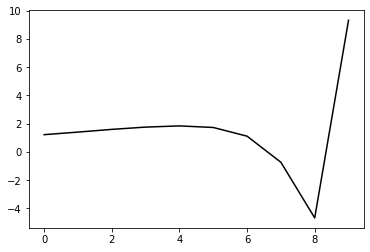

53000 0.17841130794674495
0.409663884202655 -0.21601687818029824 0.2067954787193461 0.13462783823952057
[ 1.20296082  1.56401634  1.77377159  1.9364919   2.0226871   1.91663865
  1.31417003 -0.51843867 -4.48447753  9.34459939]


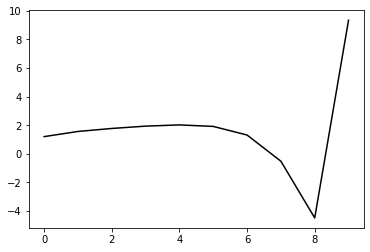

54000 0.20733522428792478
0.38833079453375285 -0.21820776672388856 0.20758679085323883 0.1341968259820874
[ 1.20341724  1.34822445  1.54802062  1.71453867  1.80224807  1.70274553
  1.12120666 -0.67880946 -4.64845473  9.32862545]


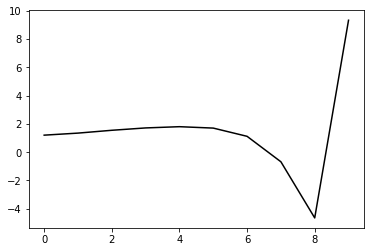

55000 0.23088236763797987
0.3840460138541287 -0.2208651481108691 0.21255514109452864 0.13225212943572276
[ 1.17863077  1.51340229  1.710148    1.88725576  1.98944713  1.90561936
  1.34653036 -0.4229229  -4.39198716  9.34224567]


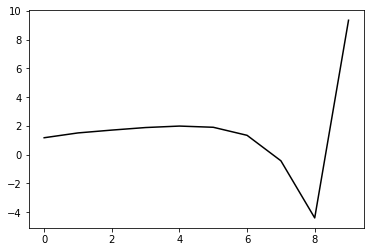

56000 0.21552376913082738
0.3811541872905055 -0.21483997531951085 0.20987813456462437 0.13772696703723877
[ 1.18218446  1.52251592  1.72246566  1.88890625  1.9884065   1.91247664
  1.37208635 -0.36798138 -4.33317272  9.3325234 ]


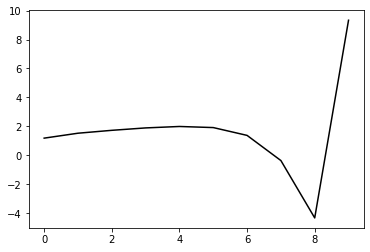

57000 0.2438510046479154
0.36897387951314353 -0.21083147745068745 0.2075259227607807 0.13843473834404152
[ 1.20043479  1.37719258  1.56726019  1.72396508  1.81571363  1.74120895
  1.21595855 -0.49517972 -4.45609195  9.33727262]


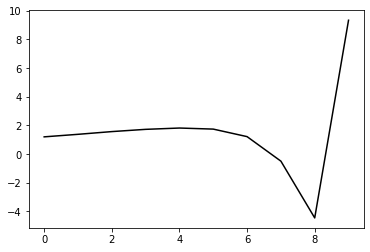

58000 0.22799864563691755
0.3656680786842719 -0.20542346551617785 0.20542634022254105 0.13857797872441935
[ 1.19961895  1.36548881  1.53829297  1.67174216  1.74263362  1.6567702
  1.13687479 -0.55152472 -4.51303808  9.37198895]


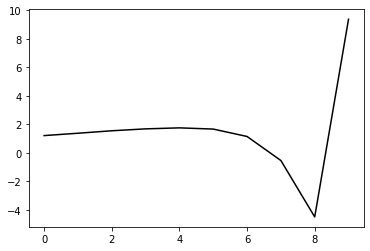

59000 0.1932707235546173
0.3612206709426602 -0.21029379466427167 0.21051401109977314 0.1390952322121778
[ 1.16096426  1.44011738  1.64893557  1.81218765  1.89947573  1.82726542
  1.32956378 -0.32362934 -4.26966697  9.33235708]


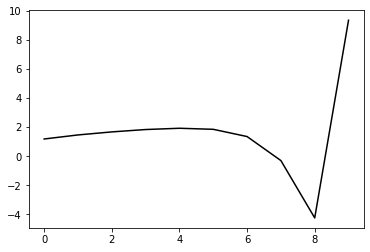

60000 0.17542189928136503
0.353137982724841 -0.21028310181874463 0.21169950542290356 0.13917113214723364
[ 1.15022305  1.47079301  1.66710252  1.81659001  1.89402997  1.80991906
  1.30635842 -0.33920224 -4.29562439  9.3278508 ]


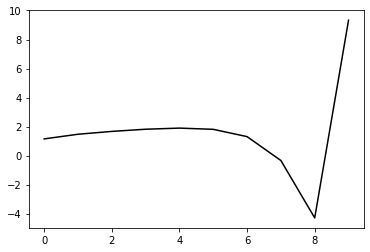

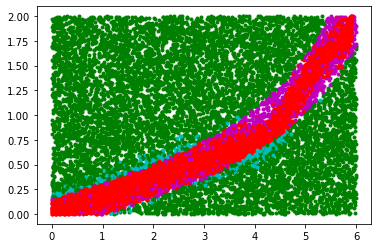

61000 0.20148462118994429
0.3442503585721272 -0.2063373365703174 0.21073874300990914 0.1370866251664376
[ 1.14088444  1.32521487  1.5054592   1.65204947  1.7257852   1.63751639
  1.13580962 -0.49358537 -4.45126906  9.33499636]


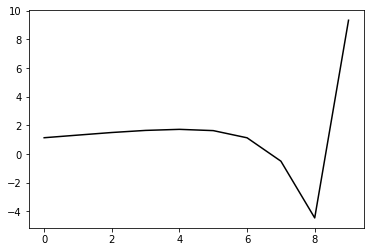

62000 0.22192208492848797
0.34323238528304256 -0.2032213808945261 0.21190109899501 0.1378681606362016
[ 1.14408961  1.40897427  1.5697087   1.72433126  1.82520953  1.7680111
  1.29864285 -0.2888215  -4.22537741  9.34697941]


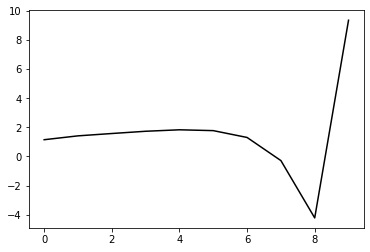

63000 0.2024246931970386
0.328121820336757 -0.2069467738589042 0.21407190817295577 0.13935107296211838
[ 1.14958807  1.26921643  1.44023549  1.58816026  1.68404396  1.63414267
  1.18090971 -0.37635023 -4.29169314  9.34911295]


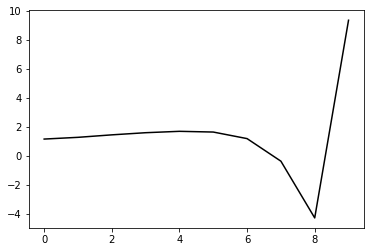

64000 0.19435737888404833
0.3344698214136295 -0.19754680441101102 0.2116489057541173 0.1349135505938864
[ 1.12044749  1.4365403   1.58257987  1.70158046  1.77287376  1.70389515
  1.23948203 -0.31881544 -4.24758786  9.33527785]


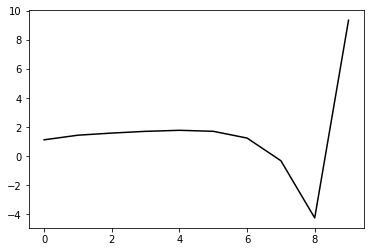

65000 0.2800045825588063
0.32053789277636496 -0.19345558729298445 0.20739607132103274 0.14079458698758973
[ 1.19772579  1.30762657  1.4753279   1.61268971  1.69144065  1.62887971
  1.18039885 -0.34618107 -4.25126877  9.31320161]


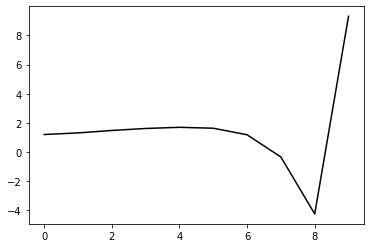

66000 0.26846970632744344
0.3162138234664576 -0.20001300154143328 0.21249501360941425 0.1395707620392494
[ 1.14536975  1.27292468  1.44593009  1.57701196  1.64498067  1.57357477
  1.12503881 -0.38587934 -4.27658058  9.34568769]


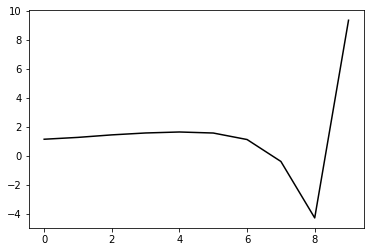

67000 0.24545068616121674
0.31865999588668437 -0.19635260677205338 0.2119410968674327 0.13930514239223057
[ 1.09999724  1.3906128   1.56566267  1.68655447  1.7396491   1.65208752
  1.19352853 -0.31331055 -4.20219608  9.35874706]


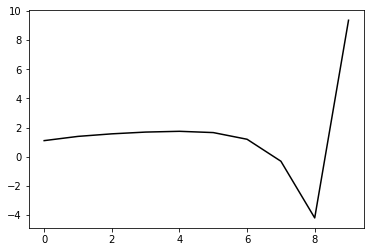

68000 0.21833153287873905
0.3124213255077935 -0.19633556871988112 0.21348279843266288 0.1389808602134051
[ 1.09952215  1.36539228  1.53373269  1.67479128  1.74549543  1.66765357
  1.21777994 -0.27127697 -4.14697703  9.35241849]


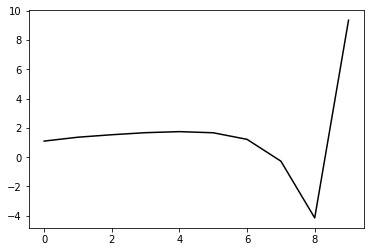

69000 0.21564937521248617
0.3075340576902683 -0.19166225564437184 0.21204685265900058 0.13711787218645574
[ 1.12431212  1.2704864   1.43274316  1.56624829  1.63729891  1.56047003
  1.11148462 -0.3668996  -4.23461406  9.35469868]


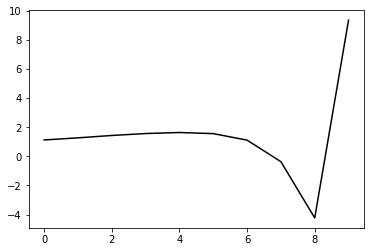

70000 0.1993743367185726
0.3049332641954635 -0.18972875773743092 0.2123311241337638 0.13702485201500628
[ 1.12882829  1.31991896  1.4990324   1.6376841   1.71280063  1.64142152
  1.19722058 -0.26758799 -4.12331483  9.32219571]


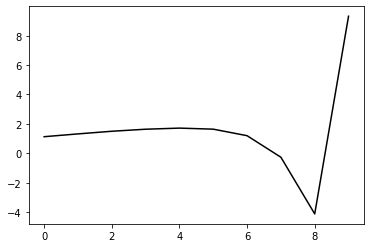

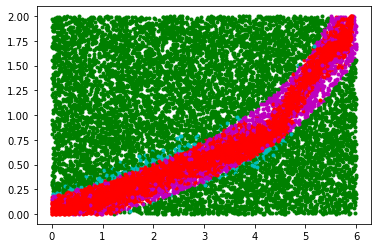

71000 0.12354665540613409
0.3046897661185737 -0.189428854836371 0.2137036649616201 0.13755118270578542
[ 1.12198804  1.39751038  1.56146323  1.70111445  1.78433173  1.72105923
  1.28447387 -0.1669576  -4.0083497   9.3515152 ]


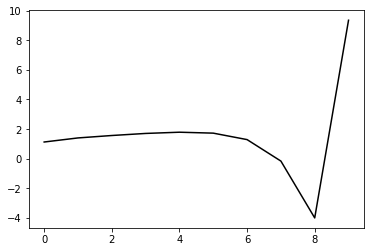

72000 0.19378085502338857
0.3109527268780163 -0.187062099073034 0.2142830233185388 0.13688332038735446
[ 1.09928482  1.41104937  1.56668319  1.68034655  1.74007262  1.66172811
  1.21692809 -0.23262853 -4.06565615  9.35891547]


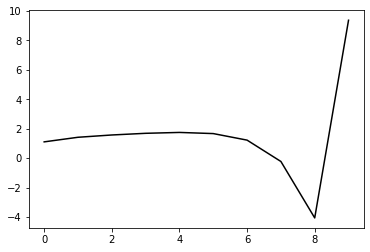

73000 0.22303112628841432
0.30194713115930655 -0.18906278929079676 0.2163698457029515 0.13740105485904372
[ 1.09716639  1.33289075  1.50824922  1.64861699  1.7191089   1.64650378
  1.20993134 -0.2247264  -4.04149591  9.34248666]


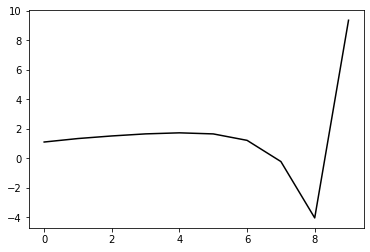

74000 0.1835759264787994
0.3024426334643387 -0.18372194527509783 0.2137597007442498 0.13997727391233025
[ 1.12257884  1.39829332  1.55172096  1.67027354  1.72629425  1.63916244
  1.19180726 -0.24360296 -4.05391699  9.32570704]


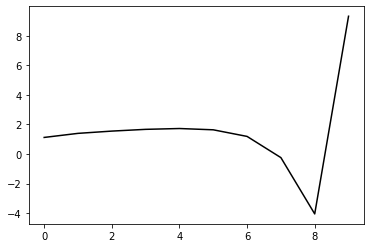

75000 0.14358607324798053
0.3013294850425501 -0.18210846512920653 0.2140621643666876 0.14225607090346168
[ 1.1223749   1.37201025  1.52512416  1.63787261  1.68638652  1.59363322
  1.14471354 -0.2824314  -4.07543185  9.29385124]


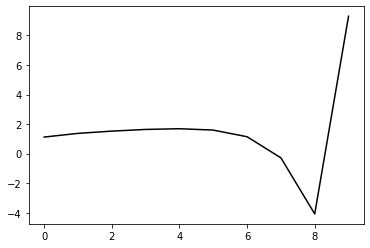

76000 0.16035793335345927
0.29981402734575807 -0.18055446761543417 0.21467215655939323 0.14328519647698015
[ 1.1168858   1.35172996  1.5189152   1.63967456  1.68794657  1.59071832
  1.13711733 -0.28898476 -4.07718034  9.34658622]


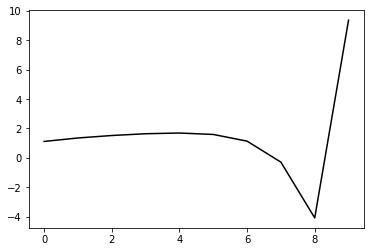

77000 0.1973057761794543
0.3012677552300732 -0.18018813443006507 0.2167227147485913 0.14282193087236295
[ 1.11079567  1.37096067  1.53395997  1.64487022  1.68313426  1.57347637
  1.10711513 -0.32633817 -4.11781392  9.3251912 ]


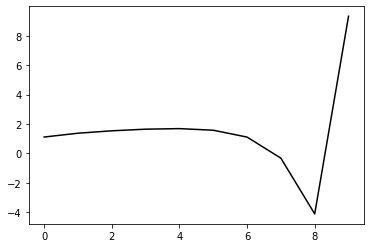

78000 0.20130408232610905
0.30200574982804673 -0.17971009696931786 0.21762382865014773 0.14510517827468158
[ 1.10500801  1.35445083  1.51616393  1.64997782  1.71084757  1.61853376
  1.16601392 -0.25022528 -4.01764902  9.35705945]


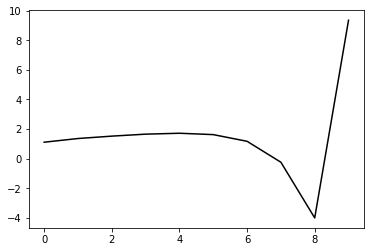

79000 0.2095650714114139
0.2913066457713587 -0.1752890980413792 0.21443091900979766 0.1447284925218294
[ 1.13385051  1.2355418   1.38508932  1.51099358  1.57637799  1.49136276
  1.04304144 -0.36670252 -4.12172551  9.35804072]


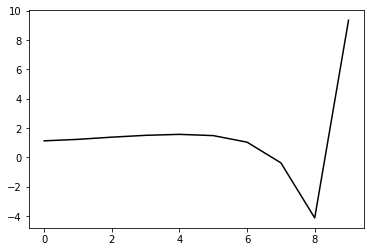

80000 0.20231764929301305
0.29477826209031877 -0.17801542169178491 0.21893851060187955 0.14250830819854882
[ 1.0894391   1.36971691  1.50120378  1.60304601  1.64677157  1.54630731
  1.08481524 -0.33439144 -4.09310526  9.35929769]


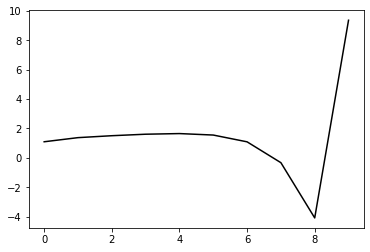

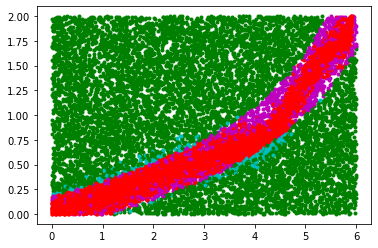

81000 0.19477132268255398
0.28897429192403695 -0.17874155732530517 0.21951310395821316 0.14416807200414372
[ 1.11821822  1.23525769  1.39953513  1.51700582  1.56560009  1.47045378
  1.01579829 -0.39404545 -4.13588737  9.31885018]


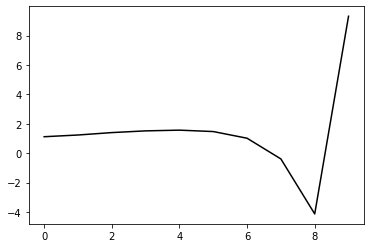

82000 0.2912627568092817
0.2928201783749971 -0.1790240149544416 0.22333019000094512 0.1398786373976521
[ 1.06088917  1.38109549  1.55047653  1.68127309  1.74655313  1.66528606
  1.22307729 -0.1753262  -3.90523883  9.35774436]


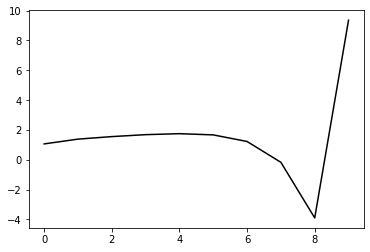

83000 0.23585172309813157
0.28681871960626454 -0.17699529293624305 0.22057455790711467 0.14485859637784573
[ 1.09090544  1.28234674  1.4482492   1.56863497  1.61742001  1.52292758
  1.07355629 -0.32451149 -4.04202462  9.33428107]


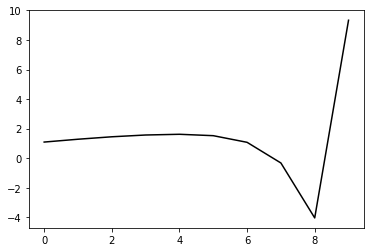

84000 0.15318214785605394
0.28946106722390375 -0.17339264862496134 0.2200394675329307 0.1451774447564394
[ 1.08846106  1.28766125  1.41603845  1.52586133  1.57523604  1.48203229
  1.03630587 -0.35333753 -4.05361307  9.324588  ]


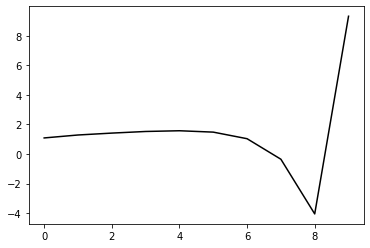

85000 0.1814707609360286
0.28929494452937415 -0.1721940162964504 0.22198468075201258 0.141899755016103
[ 1.0861875   1.38678691  1.56584567  1.70004742  1.76955992  1.69317071
  1.25952988 -0.11979472 -3.8085879   9.32929096]


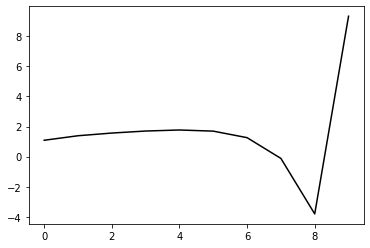

86000 0.26736624687026234
0.28198374089471107 -0.1664023986588163 0.21756921249904226 0.14365751877313354
[ 1.15713293  1.26748036  1.39980495  1.50046721  1.54429433  1.44957563
  1.00434155 -0.37891316 -4.05866377  9.3968117 ]


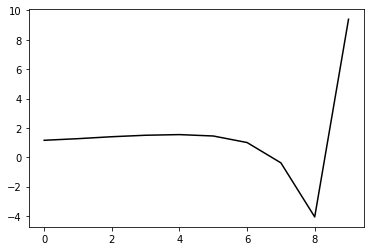

87000 0.2670628750897816
0.28204109899131197 -0.16621045890579222 0.21892467013581748 0.14164379056851617
[ 1.20445705  1.26059023  1.40631438  1.50591404  1.53912419  1.43404482
  0.98160473 -0.4058238  -4.08621536  9.40346974]


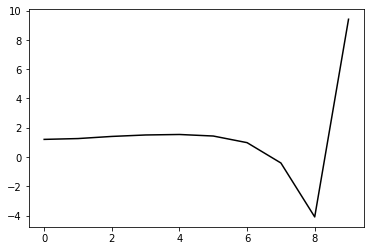

88000 0.1716215796202821
0.28665306943464547 -0.17404010538249542 0.22628625888862802 0.1409072669117619
[ 1.09161047  1.3735744   1.55610464  1.67705379  1.71842905  1.61436542
  1.16419598 -0.21487882 -3.87515277  9.36323578]


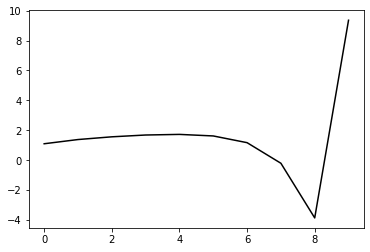

89000 0.3257539437518091
0.28085032790698067 -0.1660314675415617 0.2193710892897037 0.14745995598467654
[ 1.15595746  1.27024856  1.41658325  1.53400012  1.57674859  1.46941036
  1.01610846 -0.35907245 -4.00129756  9.40434727]


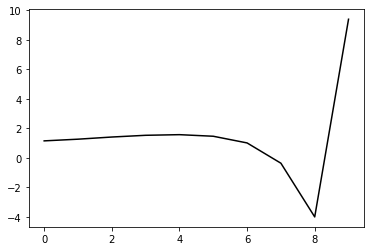

90000 0.18158745783165478
0.2833004363509434 -0.16821040654340186 0.2225250989013665 0.14500013417836702
[ 1.10797795  1.24957361  1.39030495  1.49848988  1.53915584  1.43269921
  0.97986154 -0.38978064 -4.01413845  9.36073102]


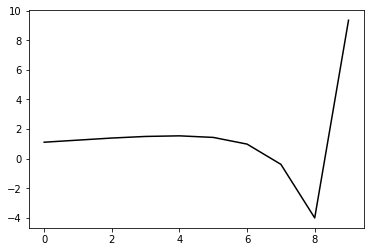

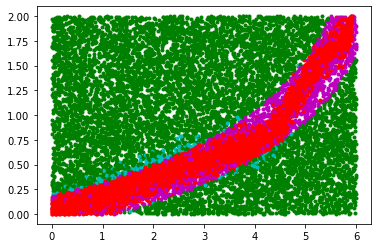

91000 0.13446953360942523
0.27540528015317267 -0.1642898702389489 0.220638352619943 0.14585564154053898
[ 1.11786431  1.18975545  1.33688352  1.46159458  1.52447658  1.44121987
  1.00767312 -0.34473093 -3.94892358  9.33646609]


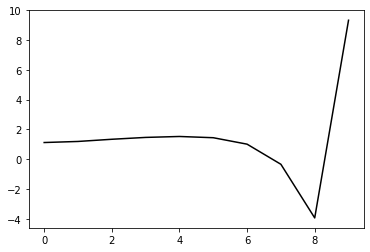

92000 0.203222018989919
0.26775552692183213 -0.16648622921720568 0.2221539718012128 0.1461494528931345
[ 1.14835142  1.18755314  1.3321898   1.46154169  1.53408339  1.46417377
  1.04236958 -0.29851366 -3.8827101   9.35539239]


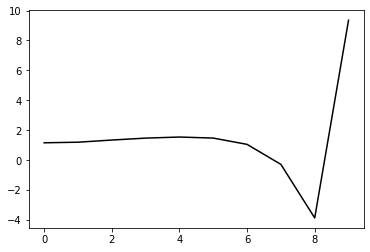

93000 0.2058623476978468
0.2687893454444233 -0.16398893222201674 0.2221079248830323 0.14205442936712986
[ 1.15575463  1.24402265  1.38104049  1.4867336   1.53868913  1.45548054
  1.025214   -0.32115942 -3.90290904  9.35062808]


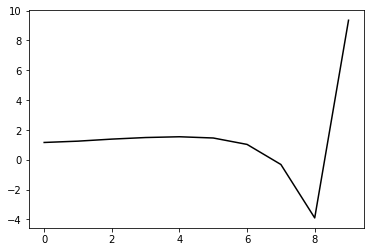

94000 0.22509275548085542
0.2667468375861699 -0.1638357983869261 0.221055728171158 0.14518123421014248
[ 1.14271801  1.21110883  1.356829    1.45647066  1.49011063  1.3919796
  0.95492588 -0.39150817 -3.95990713  9.3498514 ]


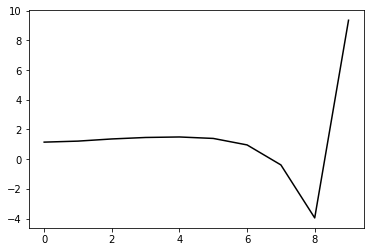

95000 0.20059199740188116
0.27106633376594724 -0.16021501806281324 0.21914881067606537 0.14547200592152404
[ 1.1461977   1.25416441  1.39881513  1.50392147  1.53343572  1.42392901
  0.97927486 -0.36815524 -3.92464239  9.36072345]


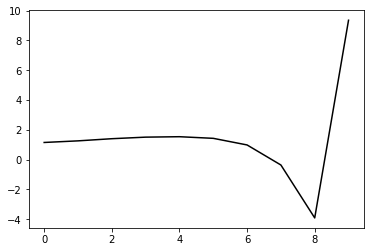

96000 0.20752506909166973
0.2735428691025393 -0.16577029033374563 0.22539610108914193 0.1418079424223841
[ 1.07297915  1.24485794  1.40191557  1.52138202  1.56642247  1.4649377
  1.02506649 -0.31445417 -3.85332518  9.36552926]


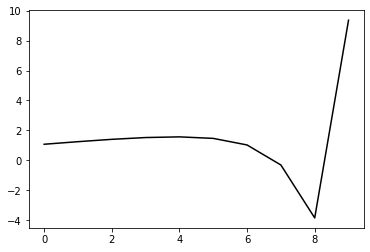

97000 0.22860480650273274
0.26858577625402225 -0.16332520010016993 0.22341945012027203 0.14491238535892545
[ 1.08652355  1.17313906  1.30934105  1.43554721  1.4961802   1.40751562
  0.97506753 -0.35687259 -3.8808762   9.41113118]


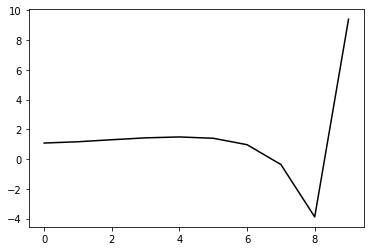

98000 0.19490356796832503
0.2684368319875963 -0.16203153512865343 0.22466466953564418 0.14342343634862603
[ 1.09742171  1.24971149  1.38538985  1.51250542  1.59122702  1.52664697
  1.11237986 -0.2054848  -3.7122596   9.36328214]


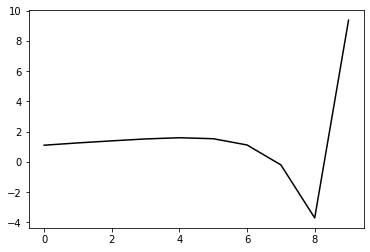

99000 0.1768705935861151
0.2666227597428732 -0.16141118589993056 0.22543336846544285 0.14159288806802536
[ 1.06563779  1.27809039  1.37527946  1.47216084  1.53690885  1.47231068
  1.06105779 -0.25419721 -3.74950112  9.36759425]


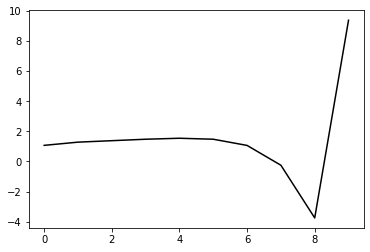

In [17]:
optimizer=tf.optimizers.Adam(learning_rate=0.0005)
for j in range (10000):    
    with tf.GradientTape() as g:
        loss=Error_func(h, m2, lam, alpha, beta, Positive[j%set], Negative[j%set])
        gradients=g.gradient(loss, [h, m2, lam, alpha, beta])
        if np.isnan(loss)==True: break
    for i in range (90):
        optimizer.apply_gradients(zip(gradients, [h]))
        if any(np.isnan(h.numpy()))==True: break
    for i in range (10):
        optimizer.apply_gradients(zip(gradients, [h, m2, lam, alpha, beta]))
        if any(np.isnan(h.numpy()))==True: break
    if j%100==0: 
        print(j*10, Error_func(h, m2, lam, alpha, beta, Positive[np.int32((j/set)%set)], Negative[np.int32((j/set)%set)]).numpy())
        print(m2.numpy(), lam.numpy(), alpha.numpy(), beta.numpy()), print(h.numpy())
        plt.plot(h.numpy(), 'k-'), plt.show()
    if j%1000==0:
        for i in range (set):
            [Positive0[i], Positive1[i]]=NN_func_01(h, m2, lam, alpha, beta, Positive[i])
            [Negative0[i], Negative1[i]]=NN_func_01(h, m2, lam, alpha, beta, Negative[i])
        for i in range (set):
            x_data1[i]=[v[0] for v in Positive0[i]]
            y_data1[i]=[v[1] for v in Positive0[i]]
            x_data2[i]=[v[0] for v in Positive1[i]]
            y_data2[i]=[v[1] for v in Positive1[i]]
            x_data3[i]=[v[0] for v in Negative0[i]]
            y_data3[i]=[v[1] for v in Negative0[i]]
            x_data4[i]=[v[0] for v in Negative1[i]]
            y_data4[i]=[v[1] for v in Negative1[i]]
            plt.plot(x_data4[i], y_data4[i], 'g.')
            plt.plot(x_data2[i], y_data2[i], 'c.')
            plt.plot(x_data1[i], y_data1[i], 'r.')
            plt.plot(x_data3[i], y_data3[i], 'm.')
        plt.show()

0 0.38432685462368854
0.27792640255819456 -0.1484204612252077 0.23114865213808516 0.13451458758278598
[ 1.04194957  1.40406508  1.51157506  1.58837377  1.62363054  1.54227743
  1.12549717 -0.19095555 -3.67687368  9.35129657]


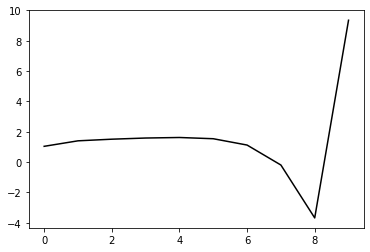

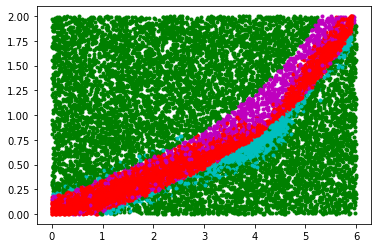

1000 0.1870414219575671
0.2637406188659454 -0.15456820223399673 0.2287365159312548 0.15462667460227747
[ 1.1181247   1.17072414  1.29319193  1.3674937   1.38543621  1.29243989
  0.8808171  -0.41816681 -3.8685273   9.34849476]


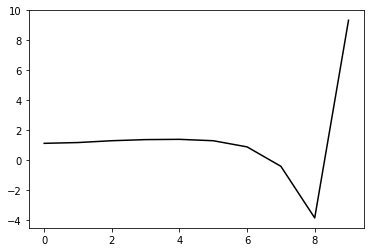

2000 0.2601132564419878
0.2702972007346064 -0.15011974509293127 0.22685448723042864 0.15354436146200542
[ 1.12936108  1.29423868  1.43044827  1.49353206  1.48748733  1.36142946
  0.92408621 -0.39054672 -3.84591431  9.34484163]


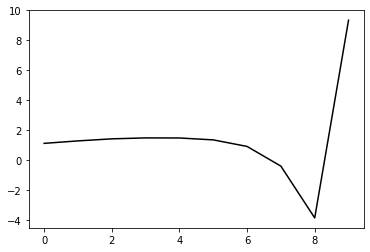

3000 0.20621867929782162
0.27544412041632954 -0.15336356100473056 0.23266232909834497 0.14470156309227808
[ 1.06101727  1.35785994  1.49481765  1.57341751  1.56617214  1.42125056
  0.96335575 -0.36348896 -3.82005059  9.3698289 ]


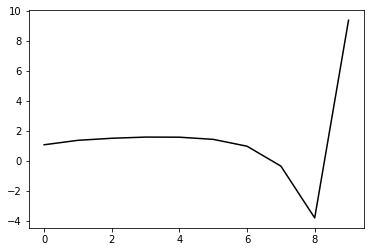

4000 0.1667636193060623
0.27733808720656483 -0.15318453284166889 0.23200680873967508 0.14726597659023333
[ 1.08417592  1.34854648  1.49472389  1.56802926  1.55439092  1.39463256
  0.91816173 -0.41997875 -3.87679512  9.35979163]


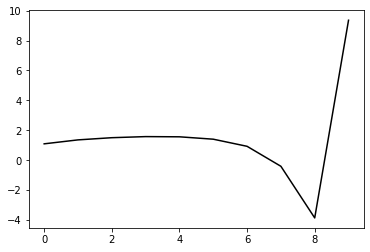

5000 0.16856056911407477
0.27863840261984646 -0.1470962025469127 0.22858663097183346 0.14993779689766293
[ 1.13610516  1.30094228  1.43844484  1.52852009  1.52877231  1.37254473
  0.89102319 -0.44964254 -3.90067944  9.36011492]


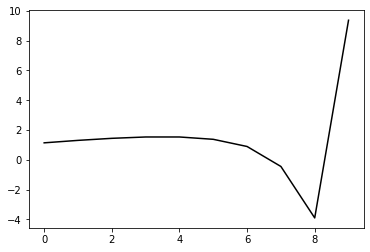

6000 0.1960512576057506
0.2721520208039194 -0.154101187521633 0.23314412183028885 0.15116802379749525
[ 1.05492881  1.29669877  1.44137263  1.54359479  1.55892407  1.41144988
  0.92840208 -0.41302959 -3.85466793  9.37057132]


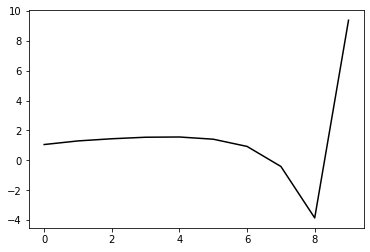

7000 0.17729710207675947
0.2732822671122057 -0.15185524160528094 0.2319712879836165 0.15325042426123872
[ 1.08022297  1.37317684  1.51782335  1.60977107  1.61497379  1.45650839
  0.95610307 -0.40163354 -3.84847377  9.36142092]


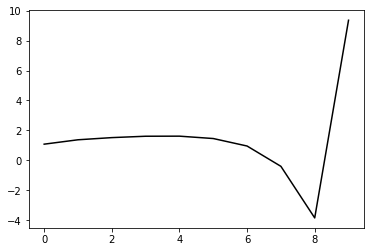

8000 0.14682504959179976
0.27270646004976373 -0.1501170982112164 0.23257023666366125 0.1496340829476515
[ 1.05149577  1.28139631  1.42568117  1.53077602  1.54915525  1.39923716
  0.89848234 -0.46273034 -3.901975    9.36736314]


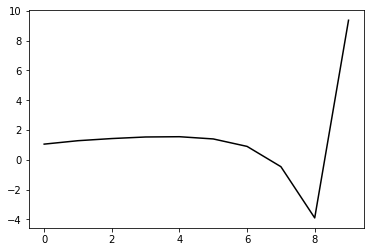

9000 0.1426809270415284
0.27120948523041577 -0.15053007832551757 0.23198942822136218 0.15446151181101694
[ 1.07884464  1.22188501  1.3627353   1.45345787  1.46508786  1.31521333
  0.8134106  -0.54788713 -3.97100694  9.35970182]


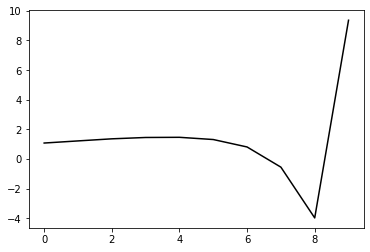

10000 0.1623174604435049
0.2699389846221702 -0.15298078292704984 0.23518056498360645 0.15157125261238663
[ 1.06802031  1.25424304  1.39999961  1.52249207  1.56660415  1.44777853
  0.9703075  -0.37589091 -3.78133135  9.35165587]


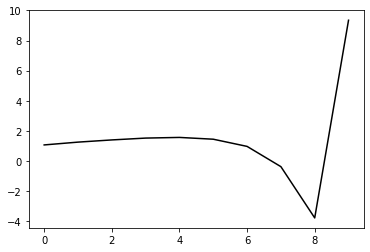

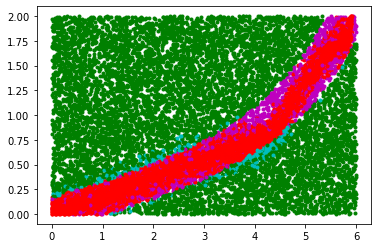

11000 0.21980451003235646
0.27314868484714583 -0.14807437864038442 0.23320593066042605 0.15121168135371277
[ 1.06434727  1.24931239  1.34290612  1.43101247  1.46661284  1.35017942
  0.87485399 -0.47364259 -3.87399361  9.38700168]


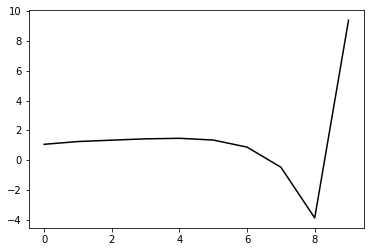

12000 0.16874246990794764
0.27399159806990436 -0.14966336403693148 0.23433196400322817 0.15229974378534408
[ 1.06992506  1.29885412  1.42029721  1.49464503  1.50910784  1.38224226
  0.9026266  -0.45042772 -3.84316498  9.32806334]


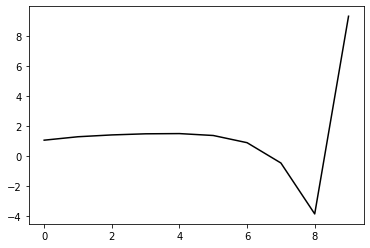

13000 0.23777270267155884
0.26724218255762855 -0.14520307377624822 0.229857564055375 0.1584859892007147
[ 1.11870763  1.18750056  1.30410684  1.39814306  1.42724678  1.31271852
  0.84957726 -0.48877904 -3.85858133  9.41329426]


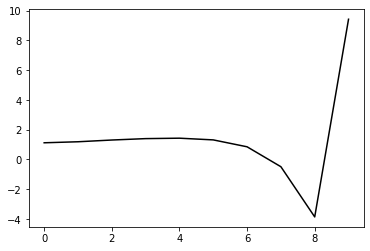

14000 0.1651404311338726
0.2755425320023749 -0.148079212845551 0.23393233851235387 0.15569536716267918
[ 1.06708203  1.33591228  1.43128392  1.49607075  1.50432751  1.3742171
  0.9005916  -0.44644062 -3.81801083  9.36084634]


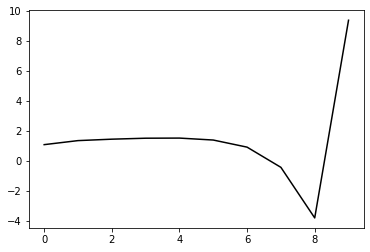

15000 0.18548729853146717
0.2694776145692066 -0.14875222482002531 0.2336404553221523 0.1589277864958939
[ 1.05699155  1.18054007  1.29510748  1.37416965  1.39013878  1.26872043
  0.80693785 -0.52820388 -3.88241096  9.35875898]


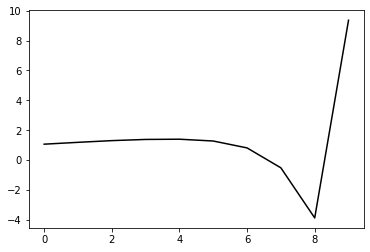

16000 0.2325496329947358
0.2790641386977356 -0.1420781068469016 0.23181401621365552 0.15634439157157107
[ 1.049579    1.32267364  1.42800458  1.49589752  1.50288547  1.37145727
  0.9015972  -0.44100705 -3.79959603  9.35694686]


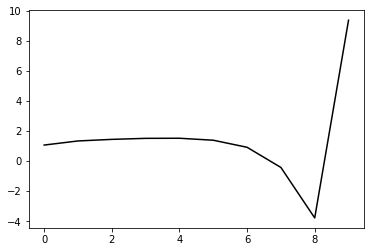

17000 0.2669243438430765
0.2648459875989212 -0.14234849011335582 0.22983417581308507 0.1594711678678295
[ 1.10985798  1.132306    1.21363762  1.29084436  1.32453171  1.22256565
  0.78110511 -0.53522176 -3.86472605  9.36147849]


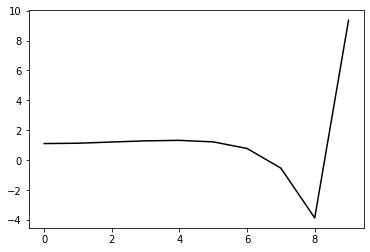

18000 0.1401924698752166
0.2650514200177719 -0.14681752848611507 0.2354967022668492 0.15347525867673964
[ 1.05250485  1.21790612  1.32874509  1.42390145  1.46897138  1.38356626
  0.95976572 -0.34109647 -3.65359829  9.38489684]


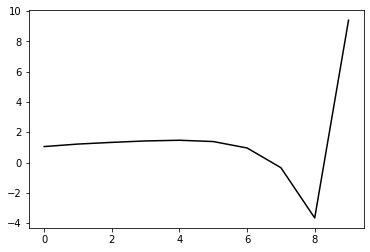

19000 0.16988805805449683
0.26959095820654316 -0.14705060100987155 0.23519944315820251 0.1543573052887017
[ 1.00941437  1.17072967  1.25870166  1.31142251  1.32300583  1.21672705
  0.78302447 -0.51984897 -3.82216409  9.38136349]


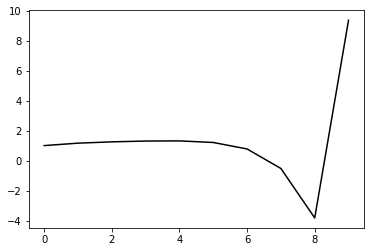

20000 0.18608530291576458
0.2598540924901436 -0.14468549403161032 0.2314377071637795 0.15809787972450698
[ 1.10234935  1.19526217  1.28078294  1.34265376  1.35410067  1.24544894
  0.8139486  -0.48479562 -3.78102505  9.34478269]


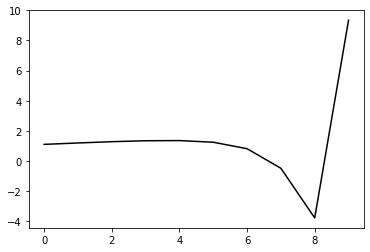

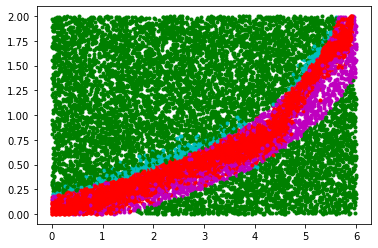

21000 0.18144756834000372
0.2666064032646091 -0.14706580026902705 0.23640910568061319 0.15375878549434263
[ 1.0665096   1.30962106  1.44037719  1.52744263  1.54762943  1.44031526
  1.01097295 -0.28423371 -3.57653039  9.3745832 ]


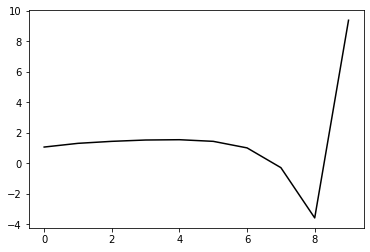

22000 0.2860503657944747
0.2712860324815587 -0.1459176605373998 0.23755435516754056 0.14849775204405471
[ 1.03608242  1.32632346  1.44968656  1.51717018  1.51426386  1.38053712
  0.9282296  -0.38305454 -3.68448753  9.37245438]


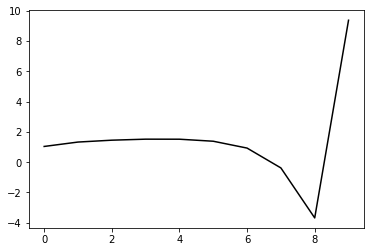

23000 0.1884869667943155
0.2683431827004126 -0.1453057738336856 0.23603283464482006 0.15256622953142976
[ 1.07943207  1.32335321  1.45185509  1.53798497  1.54785906  1.41836626
  0.96879725 -0.33417445 -3.61832253  9.34811147]


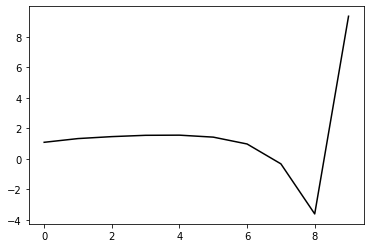

24000 0.18109301239462477
0.2611424770271944 -0.14450691859661272 0.2344866428319899 0.15242109092493264
[ 1.10935954  1.19266302  1.30150227  1.38227416  1.4015271   1.28121217
  0.83705532 -0.45574845 -3.71951053  9.34731045]


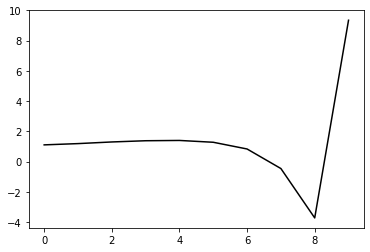

25000 0.20237046585076268
0.26257273234770817 -0.14533917855684136 0.2364186185199048 0.14983566376509608
[ 1.07717948  1.21929669  1.32654417  1.39284445  1.39913945  1.27059346
  0.81814746 -0.47987628 -3.74224501  9.36787203]


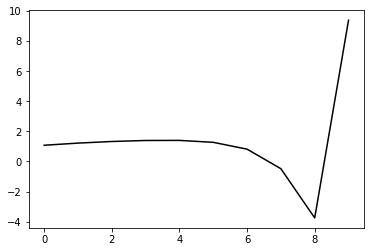

26000 0.31146547429920646
0.2675116070150831 -0.14434909184316325 0.23767428731497264 0.1471166177719342
[ 1.02076908  1.24338895  1.342391    1.41522218  1.42748114  1.30665506
  0.86375824 -0.42112999 -3.66027611  9.41919907]


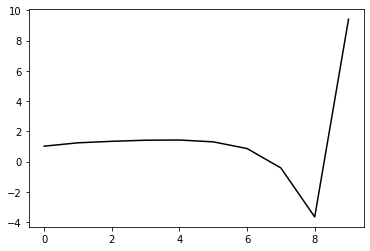

27000 0.19879160635495244
0.25794403573243224 -0.14725564854602735 0.23771554834440406 0.14739208557628855
[ 1.08862006  1.05924634  1.16966463  1.24978223  1.26847004  1.15448498
  0.71891207 -0.55537625 -3.77241427  9.38425472]


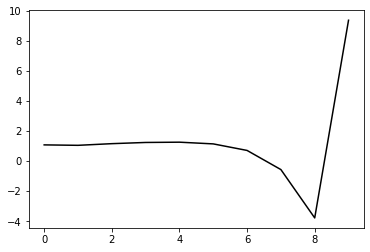

28000 0.1712001481701257
0.26721056459573006 -0.14214629431349723 0.23560557575113142 0.1509201745049026
[ 1.07984388  1.44348677  1.53206357  1.57322011  1.5616652   1.42284825
  0.96534408 -0.32701235 -3.55492766  9.36986652]


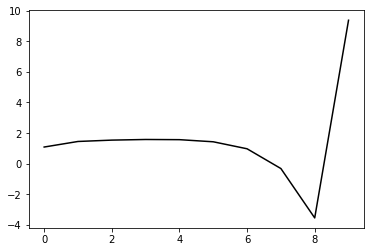

29000 0.14682306340997944
0.259910745072866 -0.14855029846026155 0.23836287123977257 0.1509557631777644
[ 1.07744515  1.17758351  1.31195533  1.37518862  1.36439939  1.22199552
  0.76551522 -0.51884742 -3.72367309  9.36010435]


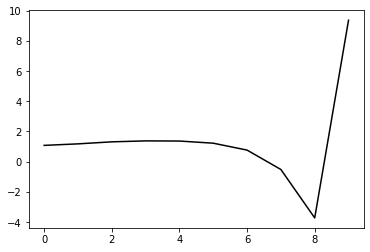

30000 0.16910182053147607
0.2601737944114736 -0.14342120779772513 0.2351157158618843 0.15192200552345111
[ 1.08715225  1.25406393  1.38056212  1.44073375  1.41574293  1.25013611
  0.76985072 -0.53490644 -3.75514926  9.34456689]


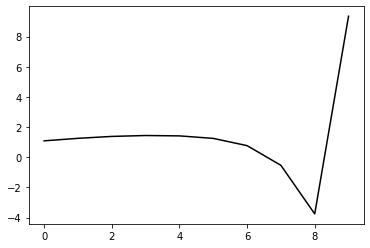

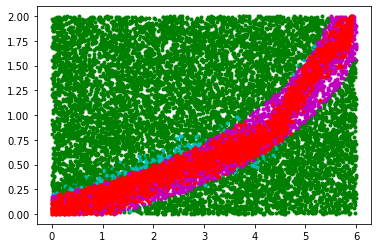

31000 0.1922801231259782
0.253885329390881 -0.14510522265334647 0.23563698981206446 0.15103695514085744
[ 1.1288097   1.11231661  1.22963913  1.30656498  1.29924847  1.14147644
  0.6644602  -0.63227276 -3.83147     9.35513509]


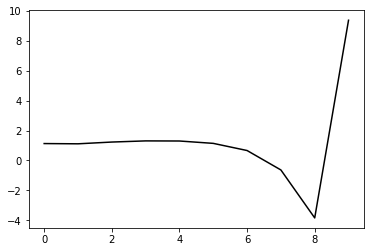

32000 0.20847662889942428
0.25231476859948604 -0.13954008063946388 0.23130867704619198 0.1529858871960389
[ 1.1259442   1.20904161  1.32418677  1.40514949  1.40413638  1.24529483
  0.7576489  -0.54889447 -3.74663155  9.37125495]


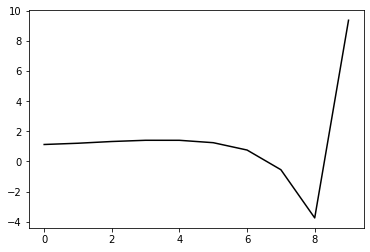

33000 0.11215624394687146
0.2591754147121925 -0.14394683583817391 0.23489479094905352 0.1509253445248862
[ 1.07302107  1.21132609  1.34023896  1.42273888  1.42266938  1.26428916
  0.77204145 -0.53831787 -3.72788707  9.40865792]


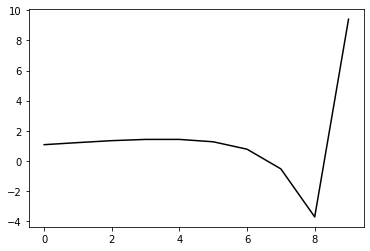

34000 0.15805920155743872
0.2649112682632066 -0.14297892498430556 0.236392558388402 0.15141750661765327
[ 1.09044978  1.33372631  1.45766542  1.53922147  1.5456467   1.39448863
  0.904267   -0.40664536 -3.58980965  9.37629873]


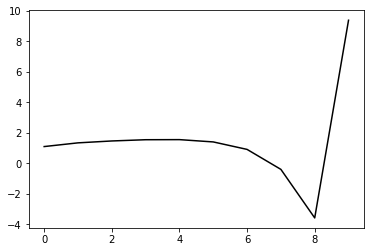

35000 0.18177166744046155
0.26281856989182545 -0.1443669520224536 0.23783904496321065 0.15079512955562774
[ 1.13799932  1.27004504  1.41814184  1.52152719  1.54202038  1.40295029
  0.92004661 -0.38729452 -3.55768191  9.41300406]


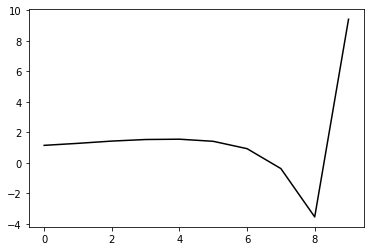

36000 0.24807147100955126
0.2672028599492855 -0.14126553030088027 0.23781360000735158 0.1478031485445414
[ 1.01616285  1.25254569  1.36208159  1.44580493  1.46594726  1.33143994
  0.84978116 -0.46172085 -3.63305916  9.38631331]


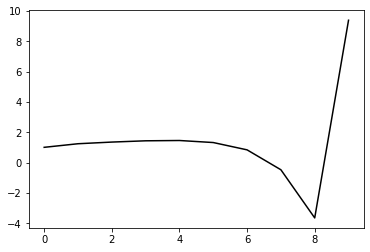

37000 0.176305097160136
0.26252888249307116 -0.14206026435352018 0.2377958365006239 0.1494659769723963
[ 1.06486826  1.32160241  1.42154662  1.49656093  1.51346537  1.38247961
  0.90416386 -0.40859924 -3.57645704  9.37788028]


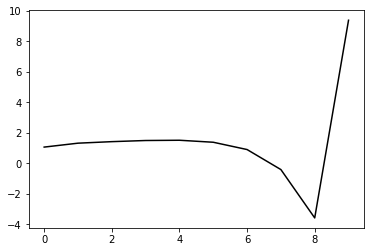

38000 0.2770048901663373
0.2664044115465078 -0.1378281801662099 0.23600370828478737 0.14989220719710117
[ 1.06921505  1.37025904  1.4714564   1.5274645   1.52076432  1.37207138
  0.88029926 -0.447627   -3.6256677   9.34946347]


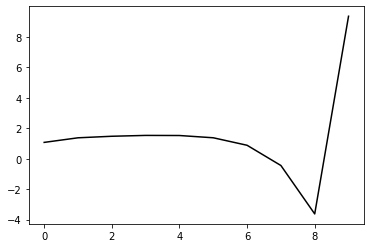

39000 0.19255713358075602
0.2610850062026715 -0.142655398473097 0.2387285259335824 0.1536263344730192
[ 1.05188845  1.31255023  1.46281993  1.56623692  1.58817986  1.46125156
  0.99141792 -0.31802228 -3.47374047  9.3833593 ]


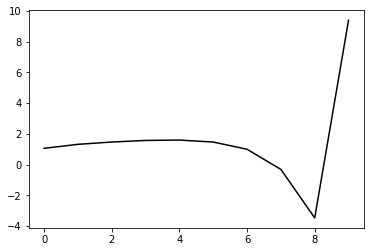

40000 0.2179637500638762
0.25779924699983314 -0.1417486546428416 0.23670342765195368 0.15130860926337933
[ 1.06639129  1.16781878  1.26737226  1.32811988  1.32444971  1.17527218
  0.68795565 -0.63541405 -3.79618434  9.37246983]


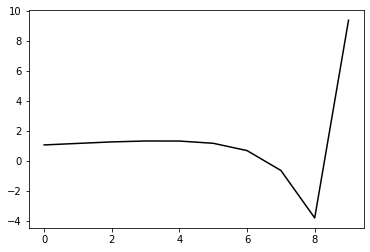

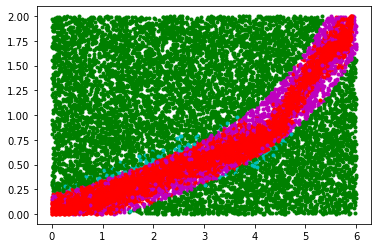

41000 0.1701038206820174
0.2647668963792263 -0.14292452677803588 0.2384420950973927 0.15438755529151788
[ 1.05847549  1.3393157   1.47790698  1.56397536  1.57121434  1.43351572
  0.96019541 -0.34741255 -3.48412366  9.37912347]


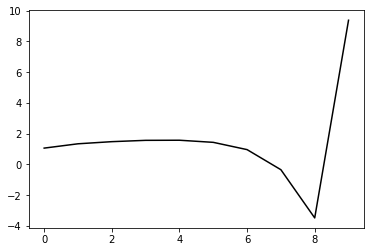

42000 0.26092910553219933
0.25951314832280187 -0.1370918303675741 0.23475799979517561 0.15400189607277734
[ 1.16637429  1.15528341  1.27643635  1.353266    1.3562446   1.21196495
  0.73259067 -0.58096718 -3.72148998  9.42198456]


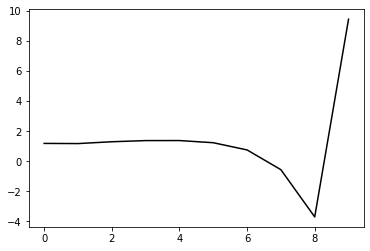

43000 0.2904239773707639
0.26601564112521814 -0.14304901966677014 0.24239218990899375 0.14854347431849504
[ 1.02697678  1.31117592  1.41801881  1.50714423  1.53460886  1.41271309
  0.95023617 -0.35134576 -3.48308235  9.41030464]


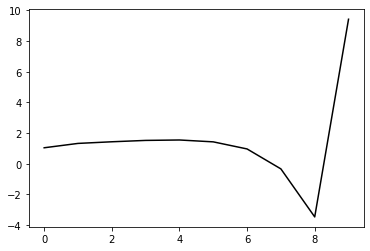

44000 0.183103749381539
0.26217030772055 -0.14073842601279538 0.2394941591192424 0.1523340411269161
[ 1.06313366  1.21139596  1.32760842  1.39307562  1.39046525  1.24737472
  0.76855023 -0.54646635 -3.68592061  9.37236246]


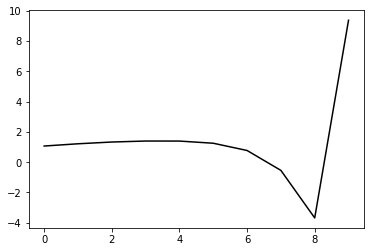

45000 0.22494180862374322
0.2646923778578151 -0.14052558204367646 0.24023042267335268 0.1493613184308877
[ 1.04356831  1.27122273  1.36403572  1.41866464  1.40941622  1.26098919
  0.78006374 -0.53573335 -3.6724522   9.31228139]


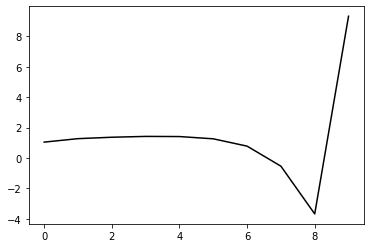

46000 0.15551173248906439
0.2594739878417218 -0.1391976105177358 0.237717935191077 0.15231618863730031
[ 1.0893981   1.2336728   1.36070543  1.43034256  1.421152    1.26896696
  0.78585164 -0.52989959 -3.66097182  9.37209227]


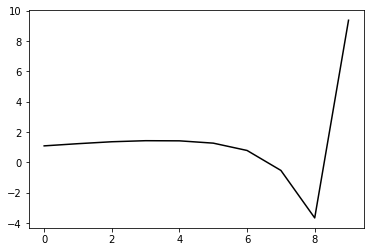

47000 0.15446048617052688
0.26651875429418787 -0.13896543959140684 0.239584489283281 0.14909307996489765
[ 1.05352308  1.31681521  1.42926442  1.4947969   1.48069956  1.31703236
  0.82180243 -0.50418794 -3.64202785  9.41508296]


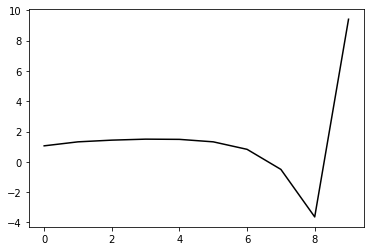

48000 0.20312721225350397
0.263859818837516 -0.13852286959166704 0.23783497342442453 0.15330968173017429
[ 1.07486581  1.25632878  1.39096233  1.46957204  1.46304744  1.30237503
  0.80802449 -0.51355732 -3.63691417  9.3645799 ]


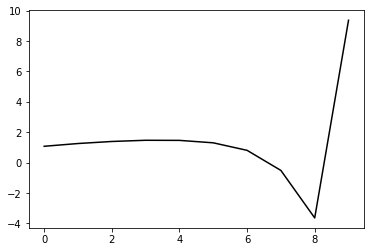

49000 0.17797655659551923
0.26505753380635916 -0.14076868186701272 0.23889733506736016 0.1538914621648804
[ 1.00061927  1.20179575  1.32204535  1.38914449  1.37650422  1.20917189
  0.70677571 -0.61987063 -3.74009918  9.37224772]


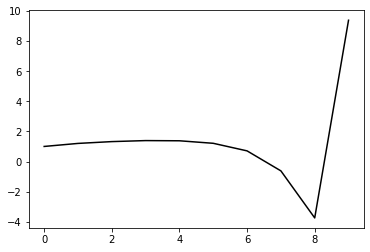

50000 0.14680960789665354
0.2626477588595314 -0.14006513815181704 0.2383505055268437 0.15572851460030523
[ 1.04855021  1.31214115  1.42425384  1.49527738  1.49671692  1.34320576
  0.8487751  -0.47203718 -3.5821537   9.36847978]


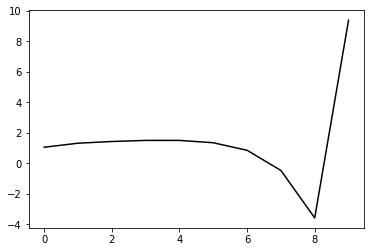

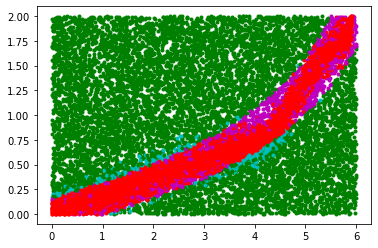

51000 0.2645911397982092
0.2663773139642944 -0.13584265847567145 0.23606781609948568 0.1559133366264338
[ 1.02838383  1.3075169   1.42647806  1.48501836  1.46822174  1.3012078
  0.79403477 -0.53909591 -3.65636167  9.36930858]


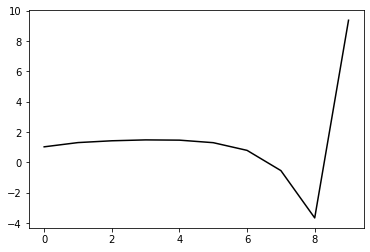

52000 0.26595379075621967
0.25674318900905513 -0.13841155521468482 0.23482668941629153 0.1610772527533118
[ 1.11134735  1.19404817  1.32463069  1.39873082  1.38882547  1.22378525
  0.71733342 -0.61600827 -3.72870583  9.34999367]


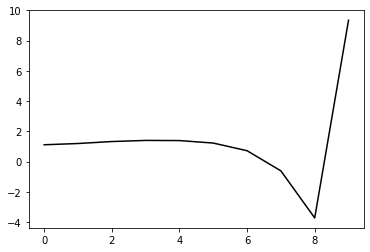

53000 0.18066674108217978
0.2579738562295577 -0.13821616955228172 0.23674377641090089 0.1532883570347573
[ 1.07090727  1.17205087  1.29302489  1.37984041  1.38101148  1.21863591
  0.70946478 -0.63027056 -3.74919207  9.37335321]


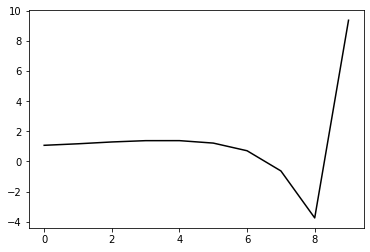

54000 0.16715316618778753
0.2594732573769412 -0.14146581466248961 0.23984498826626988 0.15256374540986078
[ 1.03655342  1.26614686  1.38788573  1.47344842  1.48377744  1.33152725
  0.82726934 -0.51081911 -3.62457658  9.37570339]


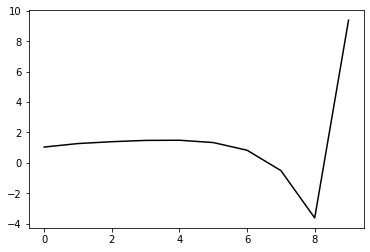

55000 0.2098144249246645
0.2546015879986322 -0.14476037185891216 0.24236833966297805 0.15204843985426272
[ 1.03864061  1.10212961  1.22007935  1.31458126  1.34116236  1.20915676
  0.72155821 -0.60508966 -3.70660227  9.32110487]


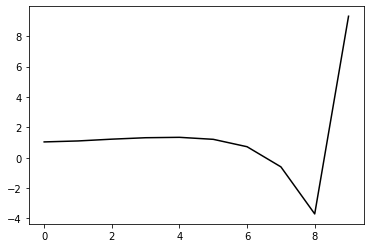

56000 0.21616893218617336
0.2608682742709751 -0.13981004089944846 0.23991219349052392 0.15270501314311768
[ 1.05158462  1.29868811  1.39329891  1.45716427  1.46927921  1.33409391
  0.84499008 -0.48696844 -3.59499779  9.33898189]


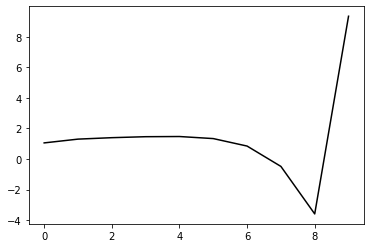

57000 0.20212069017869108
0.2619317851087705 -0.13717793634256736 0.23891491245168067 0.15351646955636833
[ 1.07787229  1.32370493  1.43770546  1.5119385   1.51898214  1.38236186
  0.89657841 -0.43506268 -3.54380195  9.36221152]


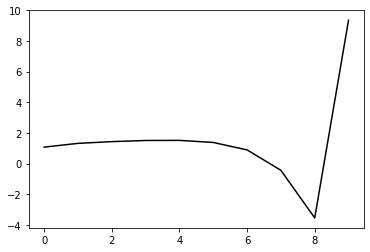

58000 0.23314350817643917
0.2533997848465412 -0.13698606160360352 0.23508217359776193 0.15813541711715964
[ 1.10377726  1.19926759  1.31117225  1.37345062  1.36275942  1.20989314
  0.71691072 -0.61631672 -3.71722175  9.36498377]


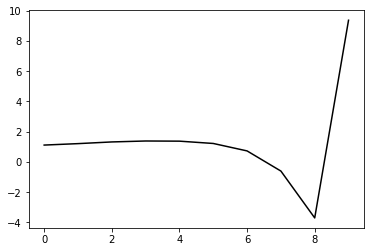

59000 0.233311768498132
0.2503952451813824 -0.1371528267092383 0.2343292295029682 0.15572900673363924
[ 1.13549579  1.13671452  1.22219605  1.29005744  1.28512849  1.13290801
  0.6413231  -0.69049708 -3.78967161  9.35922097]


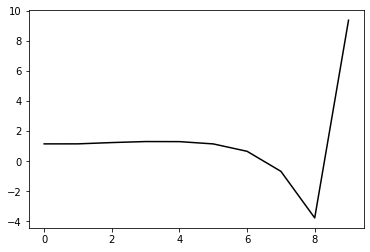

60000 0.18534881187730173
0.25322195585808066 -0.1434432595749213 0.24152654630037154 0.15247934630392473
[ 1.07479304  1.15989363  1.27082846  1.34784333  1.35888491  1.22308535
  0.74579239 -0.573642   -3.6621322   9.34072308]


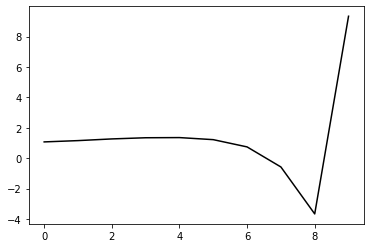

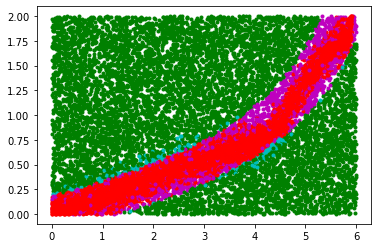

61000 0.21051978159537077
0.25976771604934795 -0.13681274259902856 0.2394606029479723 0.14920064189438564
[ 1.06707275  1.28620245  1.39737957  1.47746627  1.48764889  1.34976021
  0.86967905 -0.45383164 -3.54838241  9.38714215]


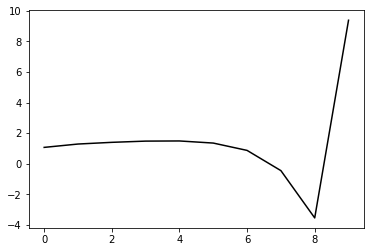

62000 0.23004146314295373
0.2557277452163568 -0.13682937917698143 0.23853661505301654 0.1484861266848496
[ 1.1000818   1.19718352  1.29552907  1.35964814  1.35922652  1.21427977
  0.73022719 -0.59363791 -3.68317558  9.43142454]


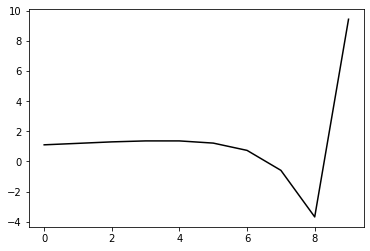

63000 0.3212636215454853
0.2562896510486768 -0.13441642724408795 0.23734888782676075 0.15067861656851725
[ 1.17809437  1.26674581  1.39832828  1.47056475  1.46598858  1.31532688
  0.82686648 -0.50050286 -3.5931551   9.42728617]


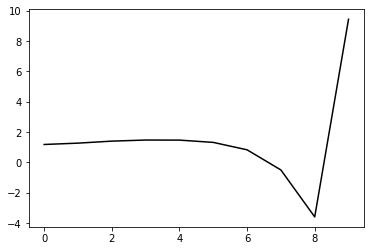

64000 0.20089383990871348
0.2561563623441817 -0.1412244895302793 0.24161674606391054 0.1494640172632298
[ 1.06793097  1.17024816  1.28509452  1.36112103  1.35733267  1.20158272
  0.70862687 -0.61980471 -3.70888614  9.32963914]


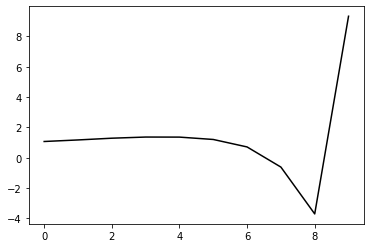

65000 0.28378370326174523
0.25537533880843166 -0.1424501419573023 0.24394964997352597 0.14791894839557812
[ 1.05364378  1.13764134  1.25571272  1.35205766  1.37244996  1.23544895
  0.75534358 -0.56230739 -3.64077641  9.40642969]


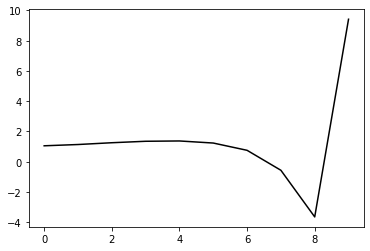

66000 0.2877511903911963
0.25806056335492483 -0.13553228451139993 0.23901474905044567 0.15013397185211327
[ 1.06960035  1.34538953  1.47438378  1.56543587  1.58498898  1.45047029
  0.97001799 -0.34942297 -3.42999411  9.34883049]


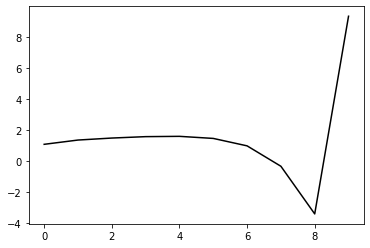

67000 0.2534519124341525
0.25550560376023224 -0.1394378538979785 0.2406669438310069 0.1492175664452265
[ 1.05772178  1.19730145  1.28036234  1.34102068  1.3437426   1.20047671
  0.71403823 -0.61009061 -3.69231805  9.3908365 ]


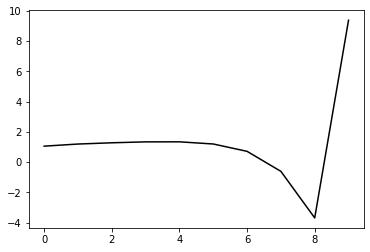

68000 0.20234359045927341
0.25382687118153663 -0.13910238847981427 0.23956045435976578 0.1513512593656056
[ 1.09251525  1.17063493  1.29033178  1.36020453  1.35860523  1.21377408
  0.72837566 -0.59493164 -3.67581312  9.34003284]


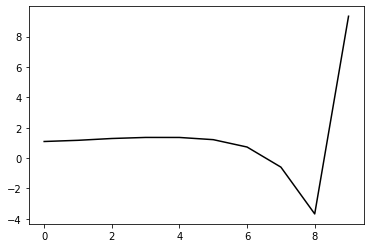

69000 0.22508186498575192
0.25850234417312845 -0.1375952003029259 0.2405050705546072 0.14664913621445955
[ 1.07591663  1.28661116  1.41543157  1.48264506  1.46970929  1.30871858
  0.80887303 -0.52834125 -3.62436452  9.37839756]


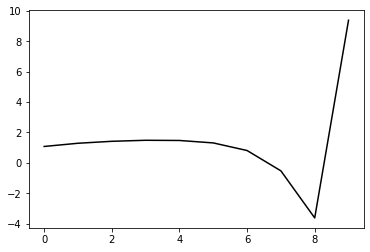

70000 0.1988455901019972
0.25601556918960283 -0.13793236430977487 0.24020597057275278 0.14958370196649584
[ 1.09850032  1.33908976  1.46457011  1.54884203  1.55743188  1.41258587
  0.92627214 -0.39733286 -3.47707772  9.36963837]


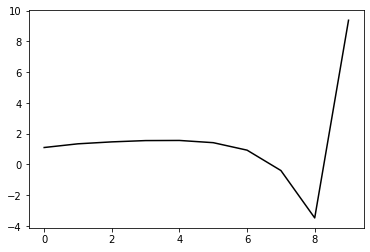

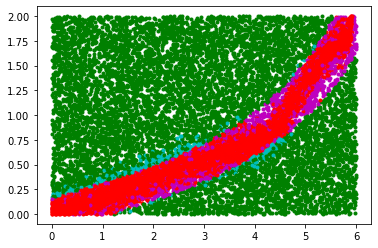

71000 0.1270616394481075
0.2569447834527508 -0.13947098031443037 0.24195150036375862 0.14707859740537768
[ 1.10191254  1.31115176  1.45114531  1.53937296  1.55037484  1.40856409
  0.9251413  -0.3936322  -3.46454154  9.37931491]


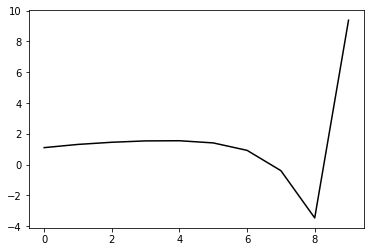

72000 0.26044742526565356
0.2510446716833167 -0.13581411876529276 0.23710400389030462 0.1542494364321363
[ 1.12851812  1.2048289   1.31213414  1.38315615  1.38247662  1.23155578
  0.74124172 -0.58070466 -3.64814966  9.36676024]


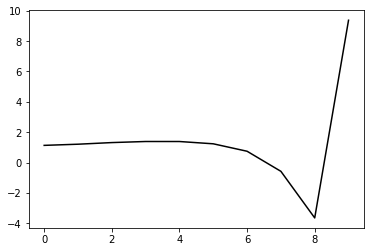

73000 0.3234149913620725
0.2578288154902224 -0.13375703676963044 0.23811229548032453 0.1515461599267353
[ 1.17875412  1.23555587  1.37947207  1.46673432  1.47300721  1.32801812
  0.84274345 -0.47467049 -3.53670067  9.36927724]


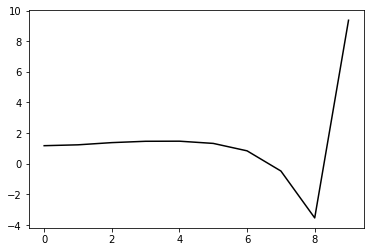

74000 0.18524834214718355
0.25935619745562644 -0.13849891419689778 0.24295929644082 0.14832273845217342
[ 1.06201312  1.3337367   1.46366726  1.54516388  1.54524997  1.39012344
  0.89351508 -0.43468982 -3.50636039  9.37564378]


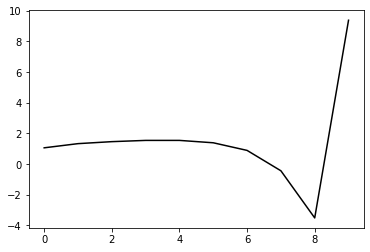

75000 0.15667616432886086
0.2574983816050737 -0.1363688713597765 0.24086925082380103 0.15022008405442028
[ 1.06437412  1.32278898  1.43656059  1.50782777  1.50212037  1.34029222
  0.83625941 -0.49764665 -3.57096926  9.37850544]


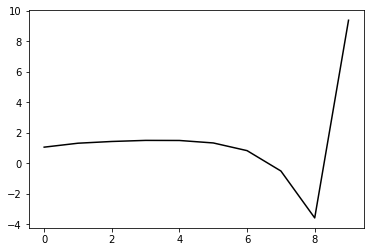

76000 0.16016145980169016
0.2564458719620704 -0.136090775847109 0.24031996589759483 0.14995725734250318
[ 1.06983699  1.26418165  1.38127361  1.45511007  1.44611706  1.27863415
  0.76678146 -0.57531674 -3.65484794  9.37599928]


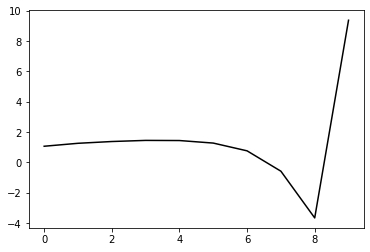

77000 0.203847527082747
0.2563426894658971 -0.13605286529540944 0.2414549507579031 0.1517616174027133
[ 1.06927584  1.31622415  1.43292774  1.51580611  1.5228088   1.3693939
  0.86699838 -0.46785306 -3.53798666  9.42160772]


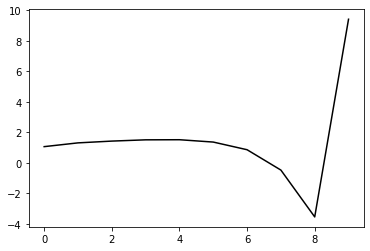

78000 0.19673074742161817
0.25679058985256853 -0.1353890616759285 0.24160846746215625 0.15107267964218896
[ 1.0705971   1.32223565  1.45312737  1.54328738  1.55935698  1.41712365
  0.92259476 -0.40856195 -3.47646002  9.38181263]


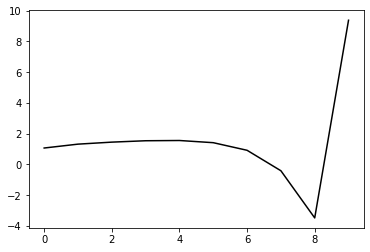

79000 0.21530896048173542
0.2604771309952693 -0.13521590236464118 0.24286101860567913 0.14594095179713054
[ 1.03324935  1.30289144  1.43511274  1.50590811  1.50236801  1.34670287
  0.84123968 -0.50129206 -3.5791771   9.37769343]


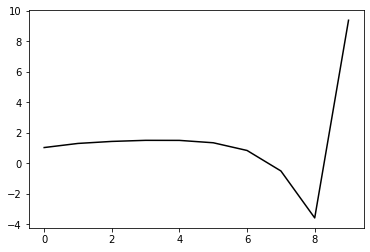

80000 0.2511584738429944
0.2610339437517587 -0.13154236957074245 0.23986093475844755 0.1490510003053434
[ 1.10875747  1.30301938  1.41705504  1.49064905  1.4857039   1.32475051
  0.81488817 -0.53286271 -3.61475963  9.4205785 ]


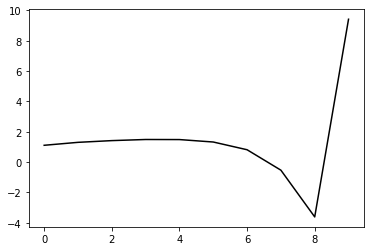

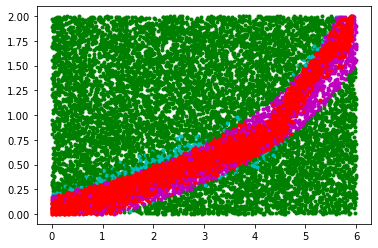

81000 0.17283642246171532
0.2556067250351343 -0.13504614755403732 0.24069892283260733 0.15055166359450314
[ 1.07833743  1.39032802  1.51329624  1.57764075  1.56727251  1.40145344
  0.88637673 -0.46784539 -3.55751384  9.3743369 ]


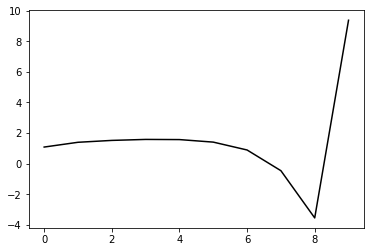

82000 0.15327907829317
0.2552465096525451 -0.13426916784966478 0.24065953376944382 0.14858955874299445
[ 1.09561929  1.29965769  1.4303179   1.5119709   1.51457836  1.35887267
  0.85274665 -0.49388647 -3.57470234  9.39479858]


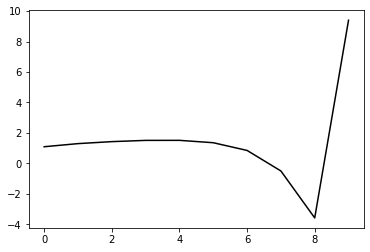

83000 0.2621467842055849
0.2602928187752243 -0.13714614923677632 0.24228119080003072 0.15137590025320777
[ 1.06030033  1.35728752  1.48593648  1.5551965   1.54464165  1.37923037
  0.86637962 -0.48404593 -3.56398221  9.38507014]


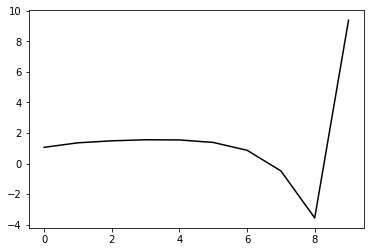

84000 0.15076039021943172
0.26265241032534314 -0.13084336517394862 0.2400551661440556 0.1490314862797718
[ 1.07075319  1.36493948  1.49170308  1.56828489  1.56242704  1.3965524
  0.88072669 -0.47578741 -3.56656328  9.35144855]


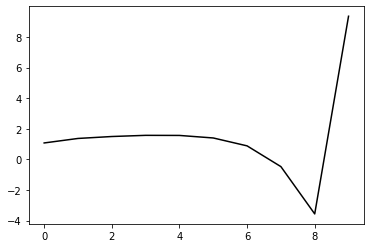

85000 0.20517152004541506
0.2551313342853691 -0.13493359808427602 0.24061551616888024 0.15112644707780132
[ 1.12827549  1.21101647  1.33345512  1.41250889  1.41362594  1.25679794
  0.74921335 -0.59890781 -3.67795333  9.37186579]


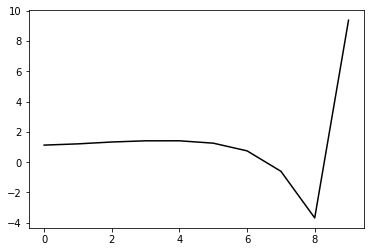

86000 0.16960144223370507
0.25802973936021245 -0.13834894190649105 0.24435803877868303 0.14652019873014338
[ 1.09053899  1.18672783  1.31236429  1.3925613   1.39273175  1.23298599
  0.72015377 -0.63582862 -3.72542908  9.35376265]


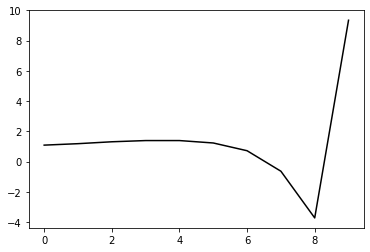

87000 0.21915806818022135
0.255975204626498 -0.13446823616235268 0.23937104536542042 0.1515578754604155
[ 1.14136854  1.2445797   1.37270735  1.44495085  1.4346988   1.26688773
  0.74870605 -0.60963897 -3.69587433  9.36067591]


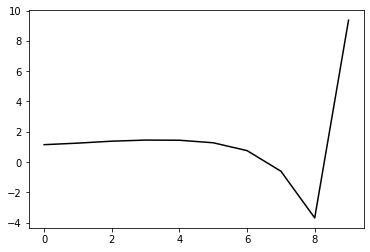

88000 0.14862136755725172
0.2604801776502842 -0.13745622760698217 0.24392207383026146 0.14503227795621132
[ 1.09873889  1.19758924  1.32147735  1.40656773  1.40599421  1.24245864
  0.72641386 -0.63175822 -3.71948343  9.3423072 ]


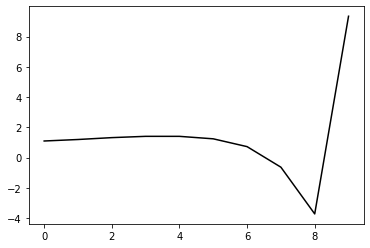

89000 0.23102705824034264
0.2601079021455077 -0.1396415992741485 0.24570026251039906 0.14574996923653066
[ 1.10636201  1.21864242  1.33838156  1.41802293  1.41379371  1.24648291
  0.72630898 -0.63488955 -3.72258158  9.37726478]


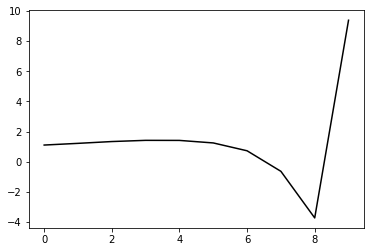

90000 0.173271256874669
0.26440600652421536 -0.1353750369801372 0.2427569028568928 0.14748602922031143
[ 1.11336414  1.2628209   1.37903225  1.44295475  1.41887096  1.23191487
  0.69338147 -0.68386092 -3.78471341  9.3270721 ]


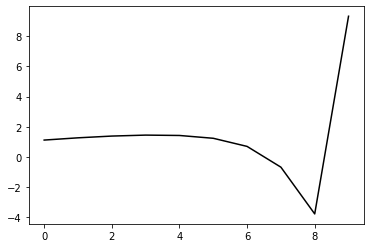

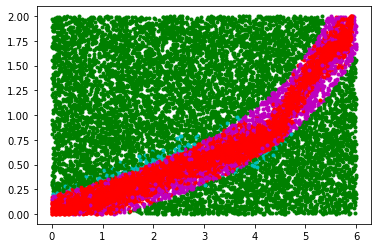

91000 0.18919005828412216
0.2572638161805427 -0.13327654798349364 0.2391255278994377 0.1505203198600076
[ 1.17271252  1.22383535  1.33743407  1.40942531  1.38673892  1.1958904
  0.6513539  -0.73192045 -3.8374819   9.35259922]


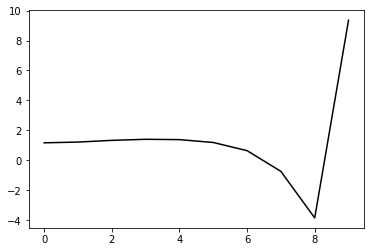

92000 0.18910997997003415
0.26206871791888564 -0.1349428271887527 0.2412442256900967 0.15234536885274874
[ 1.11783994  1.24597427  1.39202129  1.47754476  1.47058009  1.2921765
  0.75508299 -0.62281274 -3.72231149  9.37393756]


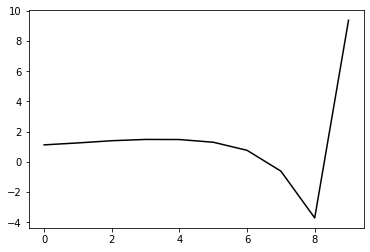

93000 0.20440141727031766
0.2692685698389818 -0.13279439436467383 0.24161293883500826 0.15030604952400006
[ 1.06135068  1.3868936   1.51485636  1.59930043  1.59710479  1.42207181
  0.88395536 -0.49863056 -3.60532542  9.37613067]


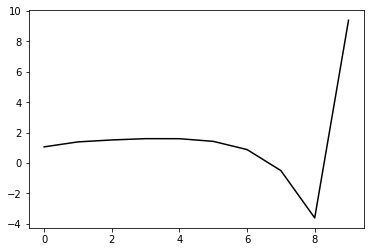

94000 0.19115182868025193
0.2638762495764912 -0.1346480561740805 0.24261152465344005 0.15109170437182992
[ 1.10681479  1.26936895  1.41214338  1.51857134  1.54254903  1.39408639
  0.87608354 -0.49338752 -3.58982448  9.3507049 ]


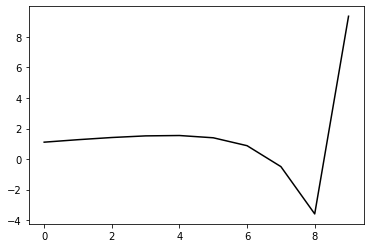

95000 0.1526407423345744
0.2591210724143292 -0.13186675314344912 0.23908184754835604 0.15488661698789816
[ 1.10655841  1.15174775  1.26182803  1.33607728  1.34525971  1.19570554
  0.68015815 -0.68835244 -3.78119379  9.38238576]


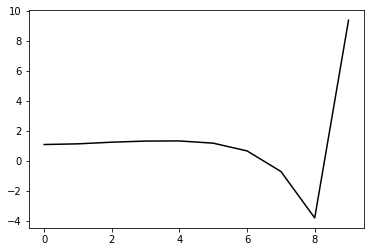

KeyboardInterrupt: 

In [18]:
optimizer=tf.optimizers.Adam(learning_rate=0.0005)
for j in range (10000):    
    with tf.GradientTape() as g:
        loss=Error_func(h, m2, lam, alpha, beta, Positive[j%set], Negative[j%set])
        gradients=g.gradient(loss, [h, m2, lam, alpha, beta])
        if np.isnan(loss)==True: break
    for i in range (90):
        optimizer.apply_gradients(zip(gradients, [h]))
        if any(np.isnan(h.numpy()))==True: break
    for i in range (10):
        optimizer.apply_gradients(zip(gradients, [h, m2, lam, alpha, beta]))
        if any(np.isnan(h.numpy()))==True: break
    if j%100==0: 
        print(j*10, Error_func(h, m2, lam, alpha, beta, Positive[np.int32((j/set)%set)], Negative[np.int32((j/set)%set)]).numpy())
        print(m2.numpy(), lam.numpy(), alpha.numpy(), beta.numpy()), print(h.numpy())
        plt.plot(h.numpy(), 'k-'), plt.show()
    if j%1000==0:
        for i in range (set):
            [Positive0[i], Positive1[i]]=NN_func_01(h, m2, lam, alpha, beta, Positive[i])
            [Negative0[i], Negative1[i]]=NN_func_01(h, m2, lam, alpha, beta, Negative[i])
        for i in range (set):
            x_data1[i]=[v[0] for v in Positive0[i]]
            y_data1[i]=[v[1] for v in Positive0[i]]
            x_data2[i]=[v[0] for v in Positive1[i]]
            y_data2[i]=[v[1] for v in Positive1[i]]
            x_data3[i]=[v[0] for v in Negative0[i]]
            y_data3[i]=[v[1] for v in Negative0[i]]
            x_data4[i]=[v[0] for v in Negative1[i]]
            y_data4[i]=[v[1] for v in Negative1[i]]
            plt.plot(x_data4[i], y_data4[i], 'g.')
            plt.plot(x_data2[i], y_data2[i], 'c.')
            plt.plot(x_data1[i], y_data1[i], 'r.')
            plt.plot(x_data3[i], y_data3[i], 'm.')
        plt.show()

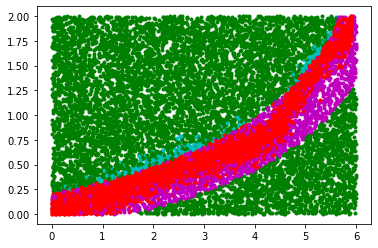

In [19]:
for i in range (set):
    [Positive0[i], Positive1[i]]=NN_func_01(h, m2, lam, alpha, beta, Positive[i])
    [Negative0[i], Negative1[i]]=NN_func_01(h, m2, lam, alpha, beta, Negative[i])
for i in range (set):
    x_data1[i]=[v[0] for v in Positive0[i]]
    y_data1[i]=[v[1] for v in Positive0[i]]
    x_data2[i]=[v[0] for v in Positive1[i]]
    y_data2[i]=[v[1] for v in Positive1[i]]
    x_data3[i]=[v[0] for v in Negative0[i]]        
    y_data3[i]=[v[1] for v in Negative0[i]]
    x_data4[i]=[v[0] for v in Negative1[i]]
    y_data4[i]=[v[1] for v in Negative1[i]]
    plt.plot(x_data4[i], y_data4[i], 'g.')
    plt.plot(x_data2[i], y_data2[i], 'c.')
    plt.plot(x_data1[i], y_data1[i], 'r.')
    plt.plot(x_data3[i], y_data3[i], 'm.')
plt.show()